Point d'amélioration à corriger un jour...:
- Tester la normalité de la variable "Diagonal" avant d'appliquer le test d'Anova.
- Explorer davantage les résultats de la régression logistique : interpréter les coefficients du modèle et les p-values du test de Wald. 

# Projet 6: [Détectez des faux billets](#M0)

# Table des matières
**[Mission 0 - Description des données](#M0)**
- [1. Analyse univariée](#M01)
- [2. Analyse bivariée](#M02)
    - [a) Authenticité et mesures des billets](#M021)
    - [b) ANOVA](#M022)
    - [c) Corrélations entre variables](#M023)
        - [Sur l'ensemble des billets](#M0231)
        - [Suivant l'authenticité des billets](#M0232)
            
**[Mission 1 - Analyse exploratoire des données](#M1)**
- [1. Détermination du nombre de composantes principales](#M11)
    - [Etude de l'inertie](#M111)
- [2. Analyse des composantes principales](#M12)
    - [a) Etude des plans factoriels de l'ACP à observer](#M121)
    - [b) Premier plan factoriel](#M122)
        - [i) Représentation des variables par le cercle des corrélations](#M1221)
        - [ii) Représentation des individus par le premier plan factoriel](#M1222)
    - [c) Deuxième plan factoriel](#M123)
        - [i) Représentation des variables par le cercle des corrélations](#M1231)
        - [ii) Représentation des individus par le deuxième plan factoriel](#M1232)
- [3. Qualité de représentation et contributions des individus](#M13)
    - [b) Premier plan factoriel](#M131)
        - [i) Qualité de représentation des indvidus](#M1311)
        - [ii) Contribution des individus](#M1312)
    - [c) Deuxième plan factoriel](#M132)
        - [i) Qualité de représentation des indvidus](#M1321)
        - [ii) Contribution des individus](#M1322)

**[Mission 2 - Algorithme de classification](#M2)**
- [1. Clustering par la méthode des k-means](#M21)
    - [a) Détermination du nombre de classes](#M211)
    - [b) Partionnement](#M212)
- [2. Clustering par classification hiérarchique ascendante](#M22)
    - [a) Distance euclidienne](#M221)
        - [Méthode "ward.D2"](#M2211)
        - [Méthode "average"](#M2212)
        - [Méthode "single"](#M2213)
        - [Méthode "macquitty"](#M2214)
        - [Méthode "median"](#M2215)
        - [Méthode "centroid"](#M2216)
    - [b) Distance "manhattan" et méthode "average"](#M222)
    - [c) Distance maximale et méthode "ward.D2"](#M223)
    - [d) Distance "canberra" et méthode "complete"](#M224)
    - [e) Distance "minkowski" et méthode "average"](#M225)
- [3. Clustering par l'utilisation de HCPC Factominer](#M23)
- [4. Comparaison entre la meilleure méthode des k-means et la meilleur des CAH](#M24)

**[Mission 3 - Analyse prédictive](#M3)**
- [1. Modélisation à l'aide d'une régression logistique multiple à variable binaire](#M31)
    - [a) Modélisation](#M311)
    - [b) Evaluation statistique de la régression](#M312)
    - [c) Calcul des odds-ratios](#M313)
    - [d) Courbe ROC](#M314)
- [2. Identification des billets](#M32)
    - [a) Programme](#M321)
    - [b) Vérification par le graphique des individus](#M322)    

In [1]:
library(tibble)
library(dplyr) 
library(tidyr)
library(FactoMineR) 
library(factoextra) 
library(missMDA)  
library(ggplot2)  
library(corrplot) 
library(repr) 
library(reshape2)
library(EnvStats) 
library(normtest) 
library(Hmisc) # matrice de corrélations
library(devtools)
library(ggpubr)
library(ggcorrplot)
library(stats)
library(fpc) # indice de Calinski-Harabasz
library(caret) # matrice de confusion et validation croisée, analyse prédictive (modélisation)
library(MASS) # modèle pas à pas basé sur le critère d'Akaïke
library(pROC) # courbe ROC

Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'FactoMineR' was built under R version 3.6.3"Warning message:
"package 'factoextra' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Warning message:
"package 'missMDA' was built under R version 3.6.3"Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded
Warning message:
"package 'reshape2' was built under R version 3.6.3"
Attaching package: 'reshape2'

The following

In [2]:
options(repr.matrix.max.rows = 600, repr.matrix.max.cols = 200)

# Mission 0 - Description des données.<a name="M0"></a>
## <span style='color:blue'>1. Analyse univariée.<a name="M01"></a>

In [3]:
notes <- read.csv('notes.csv', encoding = 'UTF-8')
dim(notes)
notes[93:108, ]

[1] 170   7

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
93,True,171.86,103.47,103.59,4.04,2.97,113.22
94,True,171.64,103.58,103.46,3.72,3.20,113.30
95,True,171.79,103.65,103.61,4.19,3.06,113.60
96,True,172.49,103.92,103.91,4.42,2.84,113.38
97,True,172.00,104.32,104.26,4.53,3.04,112.93
98,True,171.49,103.77,103.60,4.01,3.09,112.95
99,True,172.10,103.98,103.86,4.47,3.06,113.00
100,True,171.81,103.96,103.47,4.00,3.00,113.10
101,False,171.45,104.03,104.26,4.88,3.44,111.92
102,False,171.97,104.38,104.18,5.59,3.47,110.98


In [4]:
summary(notes)

 is_genuine     diagonal      height_left     height_right     margin_low   
 False: 70   Min.   :171.0   Min.   :103.2   Min.   :103.1   Min.   :3.540  
 True :100   1st Qu.:171.7   1st Qu.:103.8   1st Qu.:103.7   1st Qu.:4.050  
             Median :171.9   Median :104.1   Median :104.0   Median :4.450  
             Mean   :171.9   Mean   :104.1   Mean   :103.9   Mean   :4.612  
             3rd Qu.:172.1   3rd Qu.:104.3   3rd Qu.:104.2   3rd Qu.:5.128  
             Max.   :173.0   Max.   :104.9   Max.   :105.0   Max.   :6.280  
   margin_up         length     
 Min.   :2.270   Min.   :110.0  
 1st Qu.:3.013   1st Qu.:111.9  
 Median :3.170   Median :112.8  
 Mean   :3.170   Mean   :112.6  
 3rd Qu.:3.330   3rd Qu.:113.3  
 Max.   :3.680   Max.   :114.0  

CCL: Pas de valeurs manquantes.

In [5]:
sum(duplicated(notes))

[1] 0

CCL: Pas de doublons.


False  True 
 41.2  58.8 

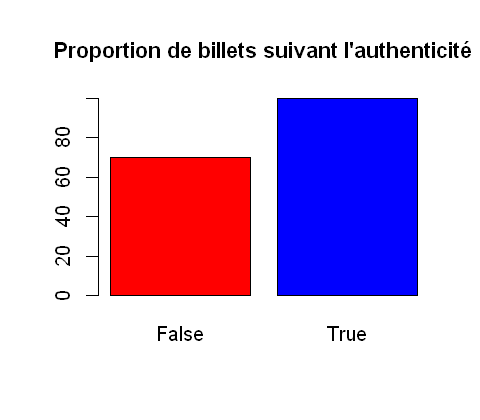

In [6]:
options(repr.plot.width = 4, repr.plot.height = 3.5)
plot(notes$is_genuine, col = c('red', 'blue'), cex.main = 1.1, main = 'Proportion de billets suivant l\'authenticité')
round(prop.table(table(notes$is_genuine))*100, 1)

CCL: Il y a 100 billets vrais et 70 billets faux, ce qui représente à peu près une proportion 60% - 40%.

## <span style='color:blue'>2. Analyse bivariée.<a name="M02"></a>
### <span style='color:brown'>a) Authenticité et mesures des billets:<a name="M021"></a>

### Répartition des mesures de chaque variable suivant l'authenticité du billet:

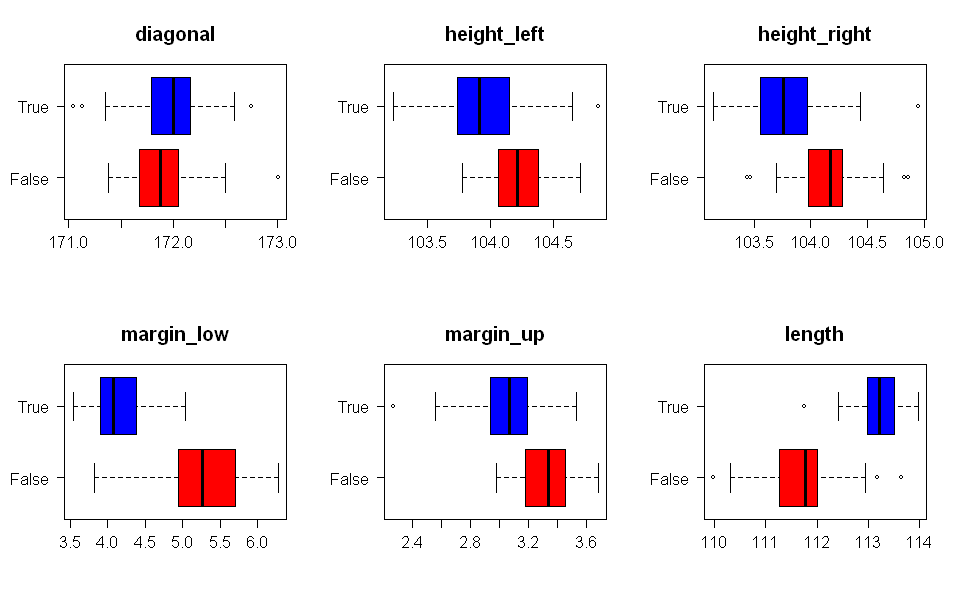

In [7]:
options(repr.plot.width = 8, repr.plot.height = 5)
par(mfrow = c(2, 3))
for (i in seq(2, 7))
{
    boxplot(notes[, i] ~ notes$is_genuine, xlab = "", ylab = "", main = names(notes)[i], col = c('red', 'blue'), horizontal = T,
           las = 1, cex.axis = 1.2, cex.main = 1.5)
}

CCL: Présence de peu d'outliers, qui pourront être considérés par la suite comme des valeurs non aberrantes (en raison du peu d'écart avec les extrémités des boxplot). 

### Courbes de densité des variables suivant l'authenticité des billets:

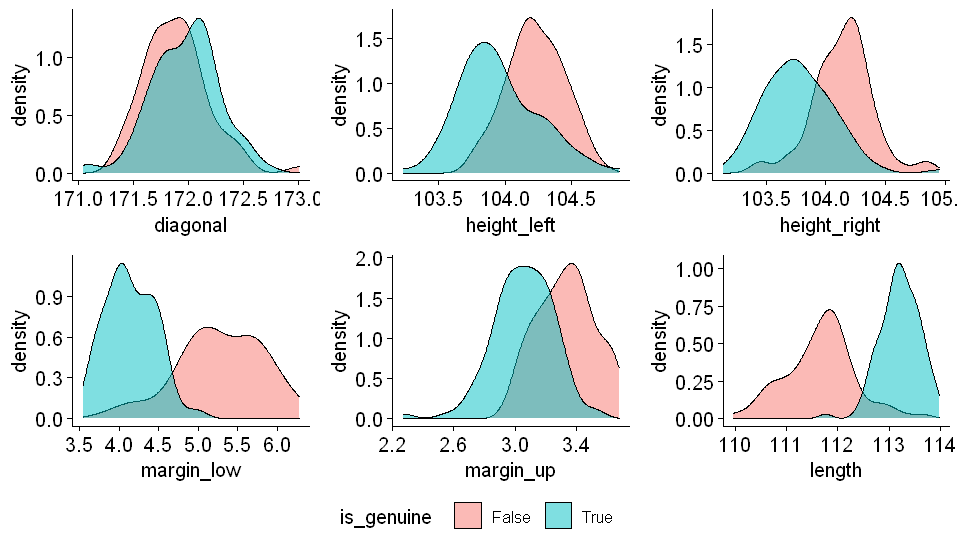

In [8]:
options(repr.plot.width = 8, repr.plot.height = 4.5)
g1 <- ggdensity(notes, x = 'diagonal', fill = 'is_genuine', palette = 'npj')
g2 <- ggdensity(notes, x = 'height_left', fill = 'is_genuine', palette = 'npj')
g3 <- ggdensity(notes, x = 'height_right', fill = 'is_genuine', palette = 'npj')
g4 <- ggdensity(notes, x = 'margin_low', fill = 'is_genuine', palette = 'npj')
g5 <- ggdensity(notes, x = 'margin_up', fill = 'is_genuine', palette = 'npj')
g6 <- ggdensity(notes, x = 'length', fill = 'is_genuine', palette = 'npj')
ggarrange(g1, g2, g3, g4, g5, g6, common.legend = TRUE, legend = "bottom")

CCL: Les faux billet auraient principalement une marge basse plus grande et une longueur plus petite que les vrais billets.

### <span style='color:brown'>b) ANOVA:<a name="M022"></a>

Vérifions l'intérêt des variables pour savoir si elles sont déterminantes à tester l'authenticité des billets.<br/>
Pour cela, on compare les moyennes de chaque variable suivant l'authenticité des billets.<br/>

Hypothèse nulle H0: les moyennes de chaque groupes propre à la variable sont égales.<br/>
Hypthèse alternative H1: les moyennes de chaque groupe propre à la variable sont différentes.<br/>
Le test est bilatéral car H0 différent de H1.<br/>

Le seuil de risque alpha est fixé à 5%.<br/>
Si la p-value est inférieur à alpha, le test sera significatif, on rejettera donc l'hypothèse nulle.

In [9]:
summary(aov(notes[, 'diagonal'] ~ notes$is_genuine, notes))

                  Df Sum Sq Mean Sq F value Pr(>F)  
notes$is_genuine   1  0.306 0.30626   3.321 0.0702 .
Residuals        168 15.494 0.09223                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [10]:
summary(aov(notes[, 'height_left'] ~ notes$is_genuine, notes))

                  Df Sum Sq Mean Sq F value   Pr(>F)    
notes$is_genuine   1  3.204   3.204   45.52 2.33e-10 ***
Residuals        168 11.823   0.070                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [11]:
summary(aov(notes[, 'height_right'] ~ notes$is_genuine, notes))

                  Df Sum Sq Mean Sq F value   Pr(>F)    
notes$is_genuine   1  5.627   5.627   73.36 6.67e-15 ***
Residuals        168 12.887   0.077                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [12]:
summary(aov(notes[, 'margin_up'] ~ notes$is_genuine, notes))

                  Df Sum Sq Mean Sq F value Pr(>F)    
notes$is_genuine   1  3.207   3.207   86.41 <2e-16 ***
Residuals        168  6.235   0.037                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [13]:
summary(aov(notes[, 'margin_low'] ~ notes$is_genuine, notes))

                  Df Sum Sq Mean Sq F value Pr(>F)    
notes$is_genuine   1  53.33   53.33   298.9 <2e-16 ***
Residuals        168  29.98    0.18                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [14]:
summary(aov(notes[, 'length'] ~ notes$is_genuine, notes))

                  Df Sum Sq Mean Sq F value Pr(>F)    
notes$is_genuine   1  98.48   98.48   360.1 <2e-16 ***
Residuals        168  45.95    0.27                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

CCL: Seule la p-value de la variable diagonal est non significative (p-value = 7% > alpha), on ne peut donc pas rejeter H0: les moyennes sont identiques.<br/>
Cette variable n'est donc pas déterminante dans l'authentification des billets.

### <span style='color:brown'>c) Corrélations entre variables.<a name="M023"></a>
### <span style='color:red'>i) Sur l'ensemble des billets:<a name="M0231"></a>

In [15]:
auth <- notes # copie du dataframe "notes"
auth$is_genuine <- as.numeric(auth$is_genuine) # conversion de la colonne facteur en variable numérique
auth[98:103, ] # visualisation

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
98,2,171.49,103.77,103.60,4.01,3.09,112.95
99,2,172.10,103.98,103.86,4.47,3.06,113.00
100,2,171.81,103.96,103.47,4.00,3.00,113.10
101,1,171.45,104.03,104.26,4.88,3.44,111.92
102,1,171.97,104.38,104.18,5.59,3.47,110.98
103,1,171.94,104.21,104.10,4.28,3.47,112.23


In [16]:
round(cor(auth), 2)
round(cor_pmat(auth), 9)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.00,0.14,-0.46,-0.55,-0.80,-0.58,0.83
diagonal,0.14,1.00,0.32,0.22,-0.18,-0.03,0.08
height_left,-0.46,0.32,1.00,0.73,0.42,0.32,-0.42
height_right,-0.55,0.22,0.73,1.00,0.51,0.37,-0.42
margin_low,-0.80,-0.18,0.42,0.51,1.00,0.17,-0.64
margin_up,-0.58,-0.03,0.32,0.37,0.17,1.00,-0.53
length,0.83,0.08,-0.42,-0.42,-0.64,-0.53,1.00


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,0.00000000,0.070189670,0.0000e+00,0.000000000,0.000000000,0.000000000,0.000000000
diagonal,0.07018967,0.000000000,2.1563e-05,0.003873237,0.018159280,0.723161301,0.297931845
height_left,0.00000000,0.000021563,0.0000e+00,0.000000000,0.000000008,0.000015518,0.000000011
height_right,0.00000000,0.003873237,0.0000e+00,0.000000000,0.000000000,0.000000859,0.000000015
margin_low,0.00000000,0.018159280,8.0000e-09,0.000000000,0.000000000,0.025677232,0.000000000
margin_up,0.00000000,0.723161301,1.5518e-05,0.000000859,0.025677232,0.000000000,0.000000000
length,0.00000000,0.297931845,1.1000e-08,0.000000015,0.000000000,0.000000000,0.000000000


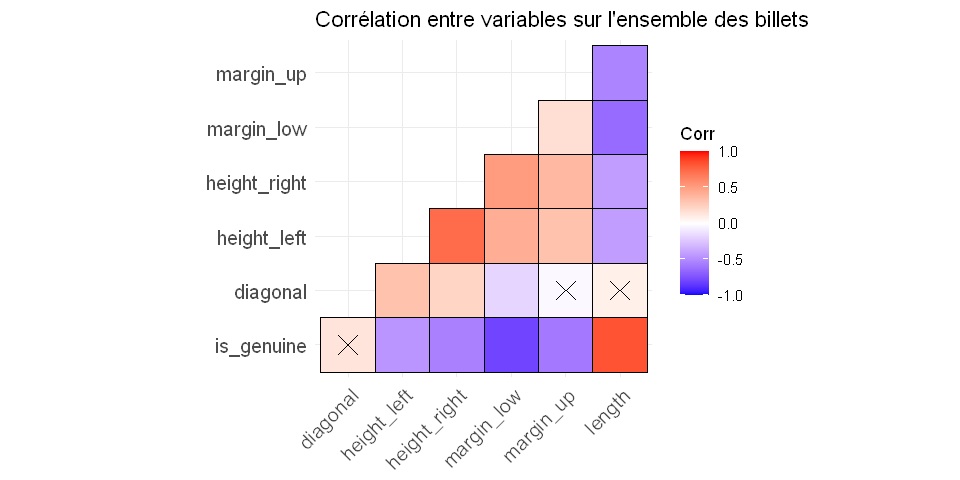

In [17]:
options(repr.plot.width = 8, repr.plot.height = 4)
ggcorrplot(cor(auth), outline.col = "black", type = 'lower', p.mat = cor_pmat(auth),
           title = 'Corrélation entre variables sur l\'ensemble des billets')

CCL:<br/>
Pour la corrélation, nous interprétons la valeur du coefficient (en valeur absolue) selon les balises de Cohen (1988):<br/>

      Autour de 0,10       effet de petite taille       corrélation faible
      Autour de 0,30       effet de taille moyenne      corrélation moyenne
      Autour de 0,50       effet de grande taille       corrélation forte

On ne peut donc pas conclure sur la corrélation des variables suivantes entre elles:
- diagonal et margin_up.
- diagonal et length.
- diagonal et is_genuine.

La diagonale ne semble pas participer à la différenciation des billets.

Forte corrélation entre:
- height_left et height_right.
- lenght et margin_low.


- is_genuine et margin_low.
- is_genuine et lenght.

Les trois dernières corrélations confirment nos conclusions précédentes.<br/>
En revanche, il semblerait difficile de séparer les billets d'après les largeurs.

### Quelques nuages de points de variables corrélées entre elles:

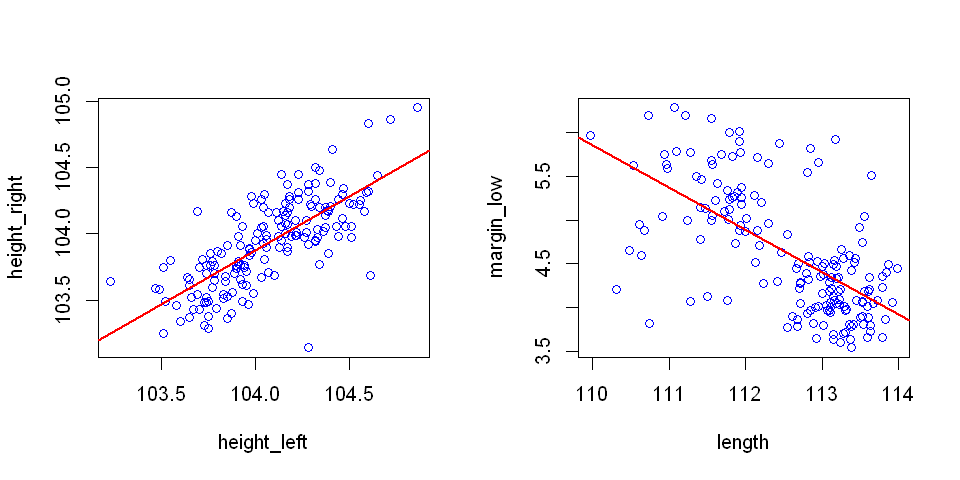

In [18]:
options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow = c(1,2))
reglin1 <- lm(notes[, 4] ~ notes[, 3])
plot(notes[, 3], notes[, 4], xlab = "height_left", ylab = "height_right", col = "blue")
abline(reglin1, col = 'red', lw = 2)

reglin2 <- lm(notes[, 5] ~ notes[, 7])
plot(notes[, 7], notes[, 5], xlab = "length", ylab = "margin_low", col = "blue")
abline(reglin2, col = 'red', lw = 2)

CCL: Graphiquement, les individus sont très regroupés quand la longueur est grande (et donc que la marge basse est petite).

### <span style='color:red'>ii) Suivant l'authenticité des billets:<a name="M0232"></a>

In [19]:
vrai <- notes[notes$is_genuine == 'True', 2:7]
faux <- notes[notes$is_genuine == 'False', 2:7]
head(vrai)
head(faux)

diagonal,height_left,height_right,margin_low,margin_up,length
171.81,104.86,104.95,4.52,2.89,112.83
171.67,103.74,103.70,4.01,2.87,113.29
171.83,103.76,103.76,4.40,2.88,113.84
171.80,103.78,103.65,3.73,3.12,113.63
172.05,103.70,103.75,5.04,2.27,113.55
172.57,104.65,104.44,4.54,2.99,113.16


,diagonal,height_left,height_right,margin_low,margin_up,length
101,171.45,104.03,104.26,4.88,3.44,111.92
102,171.97,104.38,104.18,5.59,3.47,110.98
103,171.94,104.21,104.10,4.28,3.47,112.23
104,172.04,104.34,104.48,4.88,3.28,112.15
105,171.75,104.16,104.23,5.75,3.25,111.68
106,171.99,104.18,104.20,5.26,3.23,111.83


### <span style='color:green'>Vrais billets:<a name="M02321"></a>

In [20]:
round(cor(vrai), 3)
round(cor_pmat(vrai), 9)

,diagonal,height_left,height_right,margin_low,margin_up,length
diagonal,1.000,0.409,0.393,0.178,0.039,0.023
height_left,0.409,1.000,0.671,0.249,0.160,-0.234
height_right,0.393,0.671,1.000,0.271,0.098,-0.099
margin_low,0.178,0.249,0.271,1.000,-0.651,-0.032
margin_up,0.039,0.160,0.098,-0.651,1.000,-0.229
length,0.023,-0.234,-0.099,-0.032,-0.229,1.000


,diagonal,height_left,height_right,margin_low,margin_up,length
diagonal,0.000000000,0.000024455,0.000051909,0.076349335,0.70184888,0.81681490
height_left,0.000024455,0.000000000,0.000000000,0.012584463,0.11257755,0.01928482
height_right,0.000051909,0.000000000,0.000000000,0.006394317,0.33202030,0.32909031
margin_low,0.076349335,0.012584463,0.006394317,0.000000000,0.00000000,0.75080190
margin_up,0.701848878,0.112577552,0.332020304,0.000000000,0.00000000,0.02196625
length,0.816814900,0.019284822,0.329090309,0.750801899,0.02196625,0.00000000


### <span style='color:green'>Faux billets:<a name="M02322"></a>

In [21]:
round(cor(faux), 3)
round(cor_pmat(faux), 9)

,diagonal,height_left,height_right,margin_low,margin_up,length
diagonal,1.000,0.509,0.304,-0.381,0.111,-0.139
height_left,0.509,1.000,0.604,-0.043,-0.096,0.074
height_right,0.304,0.604,1.000,0.023,0.013,0.259
margin_low,-0.381,-0.043,0.023,1.000,-0.618,0.116
margin_up,0.111,-0.096,0.013,-0.618,1.000,0.009
length,-0.139,0.074,0.259,0.116,0.009,1.000


,diagonal,height_left,height_right,margin_low,margin_up,length
diagonal,0.000000000,0.000006945,0.010631546,0.001122925,0.358595641,0.25183639
height_left,0.000006945,0.000000000,0.000000031,0.721473792,0.427049079,0.54148582
height_right,0.010631546,0.000000031,0.000000000,0.852349334,0.914767616,0.03040102
margin_low,0.001122925,0.721473792,0.852349334,0.000000000,0.000000012,0.33726678
margin_up,0.358595641,0.427049079,0.914767616,0.000000012,0.000000000,0.94040440
length,0.251836394,0.541485824,0.030401020,0.337266777,0.940404402,0.00000000


### Corrélation entre variables suivant l'authenticité du billet:

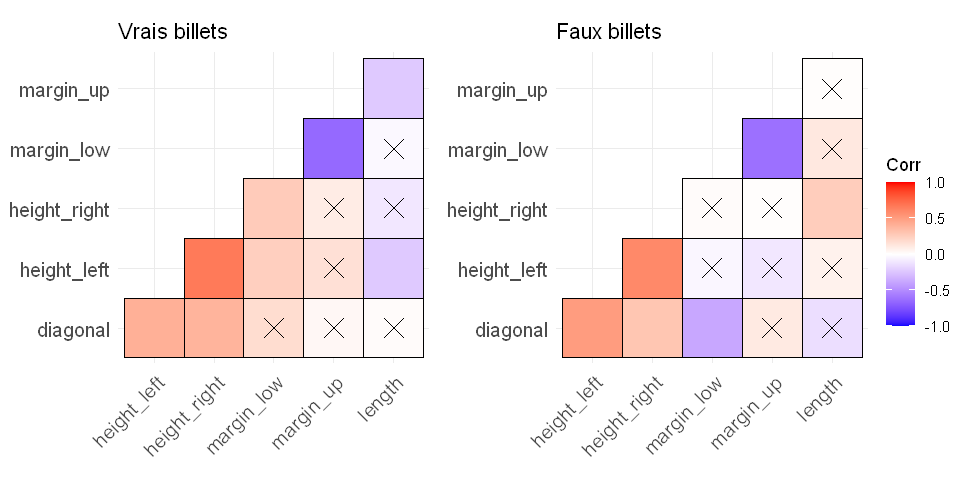

In [22]:
g_vrai <- ggcorrplot(cor(vrai), outline.col = "black", type = 'lower', p.mat = cor_pmat(vrai), title = 'Vrais billets')
g_faux <- ggcorrplot(cor(faux), outline.col = "black", type = 'lower', p.mat = cor_pmat(faux), title = 'Faux billets')
ggarrange(g_vrai, g_faux, common.legend = TRUE, legend = 'right')

CCL:<br/>
- Très forte corrélation entre margin_up et margin_low ainsi qu'entre height_left et height_right dans les deux cas.
- De même, corrélation similaire concernant diagonal et height_left. 
- Concernant margin_low, les corrélations s'inversent suivant l'authenticité du billet.
- Concernant length, dans les deux cas il n'y a jamais corrélation avec diagonal et avec margin_low.

# Mission 1 - analyse exploratoire des données.<a name="M1"></a>
## <span style='color:blue'>1. Détermination du nombre de composantes principales.<a name="M11"></a>
### <span style='color:brown'>Etude de l'inertie:<a name="M111"></a>

In [23]:
res.pca <- PCA(auth, ncp = 7, scale.unit = TRUE, quanti.sup = 1, graph = F)

In [24]:
res.pca$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,2.8468752,47.447921,47.44792
comp 2,1.3174264,21.957106,69.40503
comp 3,0.8540715,14.234524,83.63955
comp 4,0.5115777,8.526295,92.16585
comp 5,0.2767693,4.612822,96.77867
comp 6,0.1932799,3.221331,100.00000


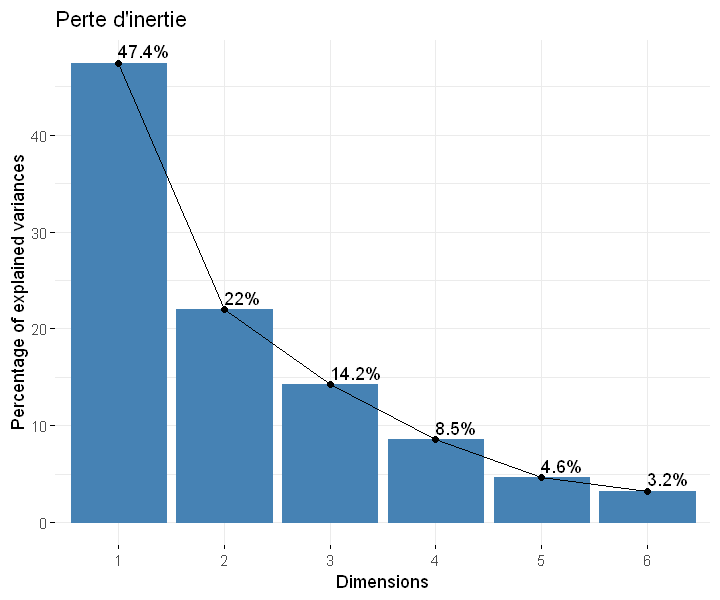

In [25]:
options(repr.plot.width = 6, repr.plot.height = 5)
fviz_eig(res.pca, addlabels = TRUE, main = 'Perte d\'inertie')

CCL:<br/>
J'utiliserai le critère du coude et non le critère de l'inertie moyenne (qui inciterait à ne retenir que deux axes).<br/>
Il semble être le critère le plus parcimonieux dans notre cas. <br/>
Nous retiendrons donc les trois premiers axes afin d'avoir une variabilité du nuage de points la plus expliquée possible.<br/>

In [26]:
# On place is_genuine en variable quantitative supplémentaire:
res.pca1 <- PCA(auth, ncp = 3, scale.unit = TRUE, quanti.sup = 1, graph = F)

## <span style='color:blue'>2. Analyse des composantes principales.<a name="M12"></a>
### <span style='color:brown'>a) Etude des plans factoriels de l'ACP à observer:<a name="M121"></a>

In [27]:
var <- get_pca_var(res.pca1)
var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

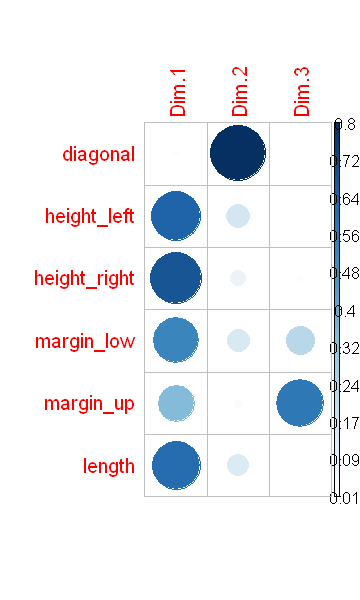

In [28]:
options(repr.plot.width = 3, repr.plot.height = 5)
corrplot(var$cos2, is.corr = F)

CCL:<br/>
- L'analyse du plan factoriel de dimension 1 et 2 mettra en exergue la diagonale sur la dimension 2 tandis que celle du plan factoriel de dimension 1 et 3 illustrera "margin_up" sur l'axe 3 principalement.<br/>
- Il suffira donc d'observer les cercles de corrélations des dimensions 1 et 2 ainsi que celui des dimensions 1 et 3 pour avoir une vision bien représentative des variables.

En ACP normée, les variables qui sont le mieux représentées sont aussi celles qui contribuent le plus à l’axe et inversement, donc pas besoin d’étude spécifique de la contribution des variables aux axes principaux.

### <span style='color:brown'>b) Premier plan factoriel:<a name="M122"></a>
### <span style='color:red'>i) Représentation des variables par le cercle des corrélations:<a name="M1221"></a>

In [29]:
res.pca1$var

,Dim.1,Dim.2,Dim.3
diagonal,0.1236346,0.8948635,-0.08215244
height_left,0.8022997,0.3893886,0.11345001
height_right,0.8298348,0.2703538,0.14216371
margin_low,0.7272578,-0.3679098,0.47391620
margin_up,0.5948294,-0.1619761,-0.75887278
length,-0.7852090,0.3610224,0.11728832
,Dim.1,Dim.2,Dim.3
diagonal,0.1236346,0.8948635,-0.08215244
height_left,0.8022997,0.3893886,0.11345001
height_right,0.8298348,0.2703538,0.14216371


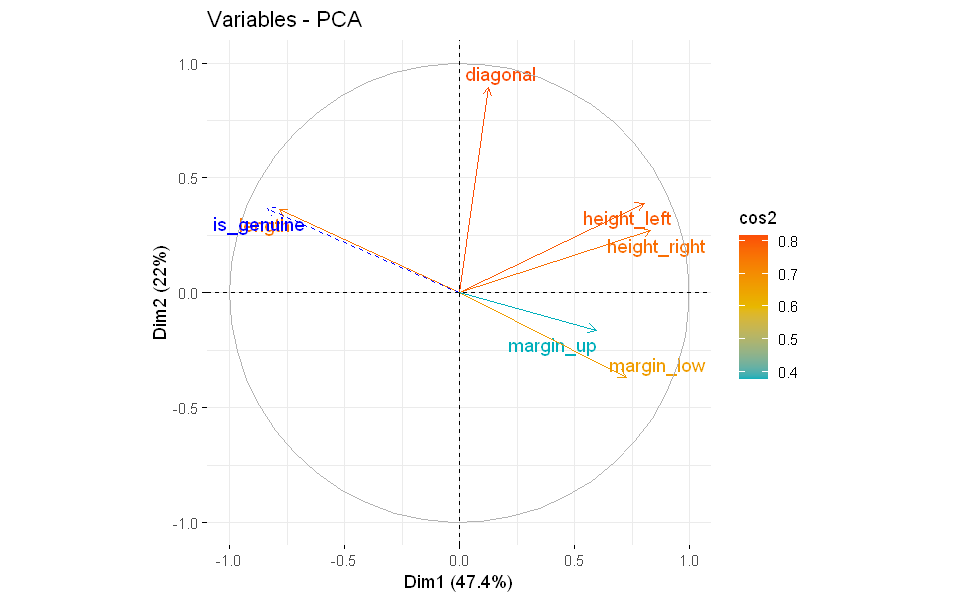

In [30]:
options(repr.plot.width = 8, repr.plot.height = 5)
fviz_pca_var(res.pca1,
             col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Évite le chevauchement de texte
             )

CCL:<br/>
- Mise à part margin_up, toutes les autres variables sont très bien représentées dans le plan factoriel.<br/>
- On retrouve nos corrélation trouvées auparavant entre length, margin_low et is_genuine. length et margin_low sont corrélées négativement et is_genuine et length le sont positivement. Cela confirmerait donc notre première supposition, à savoir que la nature d'un faux billet se caractériserait principalement par une longueur plus petite et une marge basse plus grande par rapport à l'ensemble des billets.<br/>
- La variable "diagonal" est très corrélée à la deuxième composante. Etant la seule à contribuer aussi fortement, on peut en déduire que l'axe 2 est conditionné par ‘’diagonal’’. Ce qui confirme également qu’il n’y a pas pas de corrélation entre diagonal et is_genuine, et donc que cette variable ne jouera pas un rôle prépondérant dans l’identification des billets.<br/>
- On risque alors de trouver l'essentiel des vrais billets dans la zone gauche et les faux billets dans la zone droite.

### <span style='color:red'>ii) Représentation des individus par le premier plan factoriel:<a name="M1222"></a>

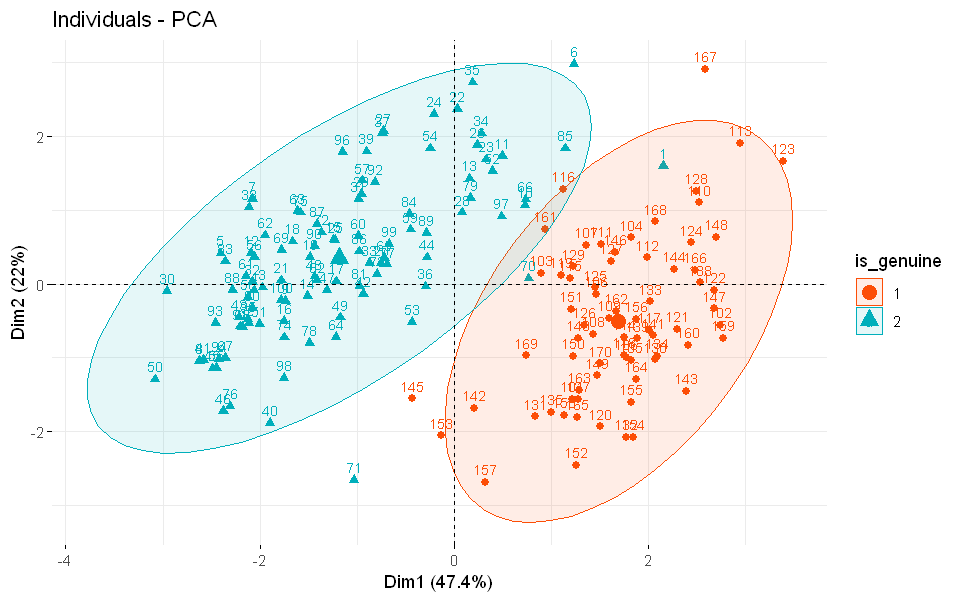

In [31]:
options(repr.plot.width = 8, repr.plot.height = 5)
fviz_pca_ind (res.pca1,
              geom = c('point', 'text'),
              habillage = 1,
              pointsize = 2,
              labelsize = 3,
              palette = c("#FC4E07", "#00AFBB"),
              addEllipses = TRUE
             )

CCL: Peu d'individus dans l'intersection des ellipses, le plan factoriel est donc propice à l'identification des billets.

### <span style='color:brown'>c) Deuxième plan factoriel:<a name="M123"></a>
### <span style='color:red'>i) Représentation des variables par le cercle des corrélations:<a name="M1231"></a>

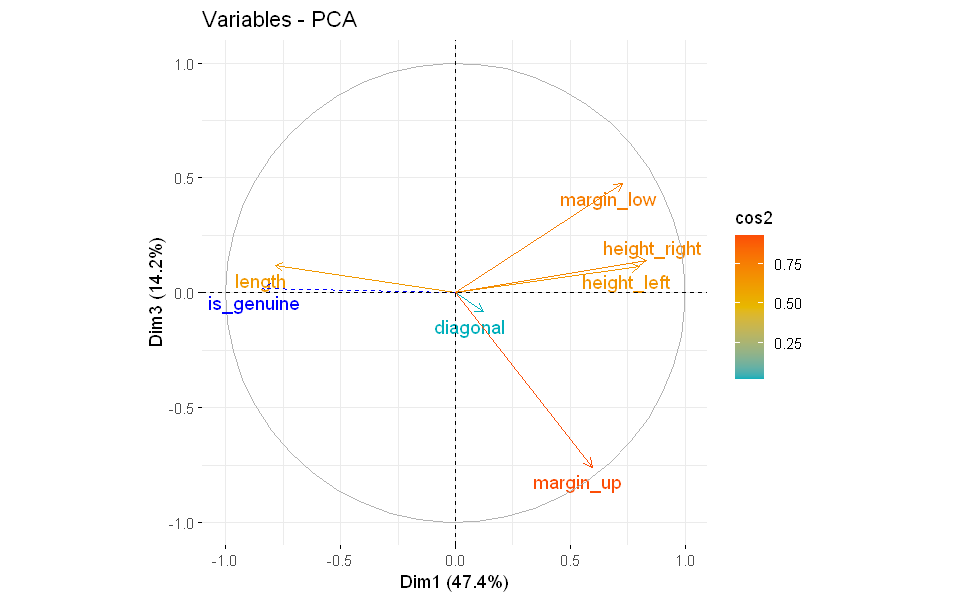

In [32]:
options(repr.plot.width = 8, repr.plot.height = 5)
fviz_pca_var(res.pca1,
             axes = c(1, 3),
             col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Évite le chevauchement de texte
             )

CCL:<br/>
- Sur l'axe 1, length et is_genuine sont très corrélés: l'axe 1 contribue fortement à identifer les billets.
- margin_up, mieux représenté sur ce plan, est corrélé à la fois avec l’axe 1 et l’axe 3.

### <span style='color:red'>ii) Représentation des individus par le deuxième plan factoriel:<a name="M1232"></a>

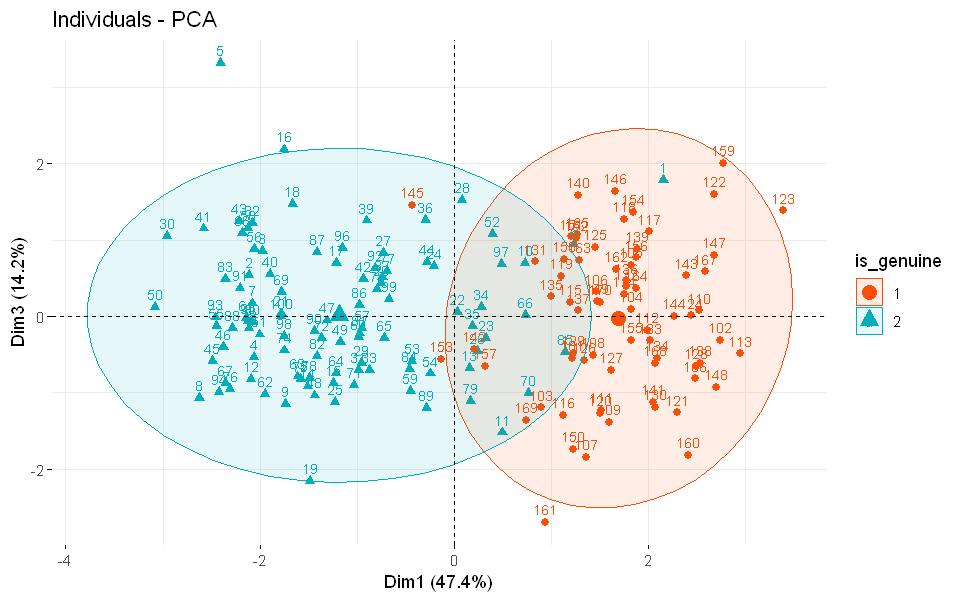

In [33]:
options(repr.plot.width = 8, repr.plot.height = 5)
fviz_pca_ind (res.pca1,
              axes = c(1, 3),
              geom = c('point', 'text'),
              habillage = 1,
              pointsize = 2,
              labelsize = 3,
              palette = c("#FC4E07", "#00AFBB"),
              addEllipses = TRUE
             )

CCL: Ici l'intersection des ellipses comprend beaucoup de billets, il sera donc difficile d'avoir une analyse rigoureuse de la nature des billets.<br/>
Ce plan factoriel ne sera donc pas indispensable dans l'analyse.

## <span style='color:blue'>3) Qualité de représentation et contributions des individus.<a name="M13"></a>
### <span style='color:brown'>a) Premier plan factoriel:<a name="M131"></a>
### <span style='color:red'>i) Qualité de représentation des individus:<a name="M1311"></a>

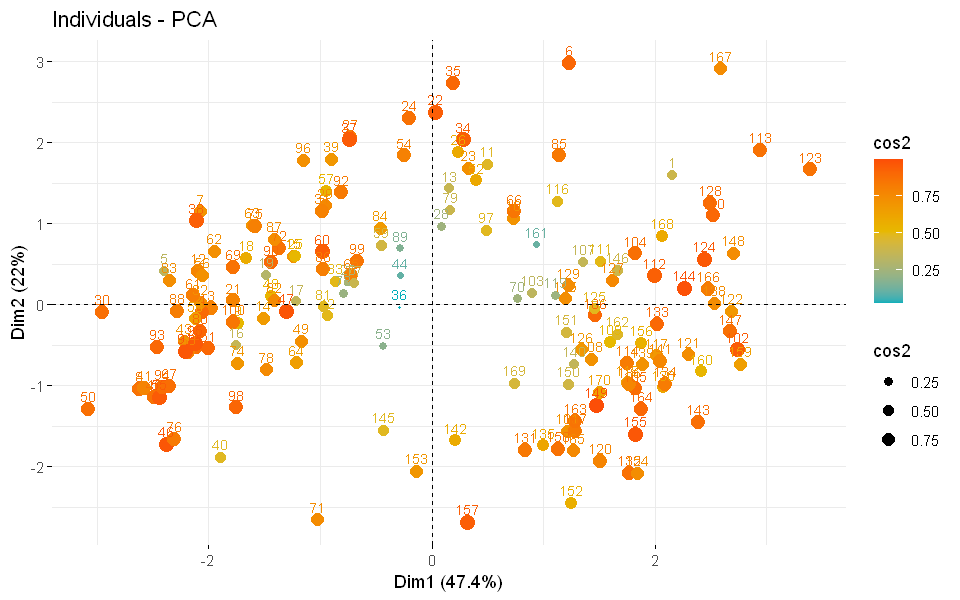

In [34]:
options(repr.plot.width = 8, repr.plot.height = 5)
fviz_pca_ind (res.pca1,
              geom = c("point", "text"),
              labelsize = 3,
              col.ind = "cos2", 
              pointsize = "cos2",
              gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
              pointshape = 20
              )

CCL: Peu d'individus sont mal représentés.

### <span style='color:red'>ii) Contributions des individus:<a name="M1312"></a>

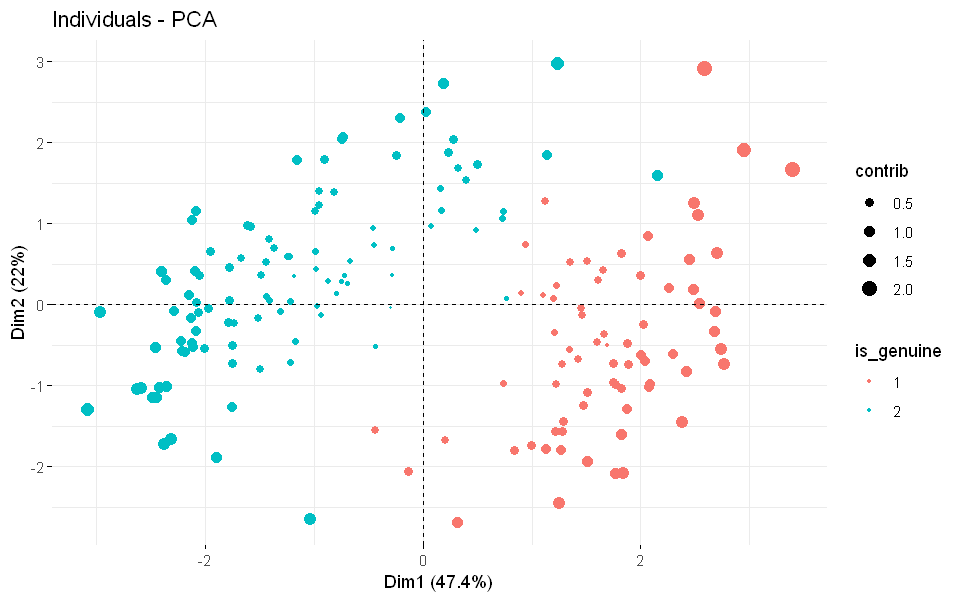

In [35]:
options(repr.plot.width = 8, repr.plot.height = 5)
fviz_pca_ind (res.pca1,
              geom = ("point"),
              habillage = 1,
              pointsize = "contrib",
              pointshape = 20
              )

CCL:
- Qualité de représentation et contribution des billets relativement symétriques sur le premier plan factoriel.
- Les billets sont assez bien dispersés selon leurs natures.<br/>
- Plus on est au centre, moins il y a d'impact sur la projection.

### <span style='color:brown'>b) Deuxième plan factoriel:<a name="M132"></a>
### <span style='color:red'>i) Qualité de représentation des individus:<a name="M1321"></a>

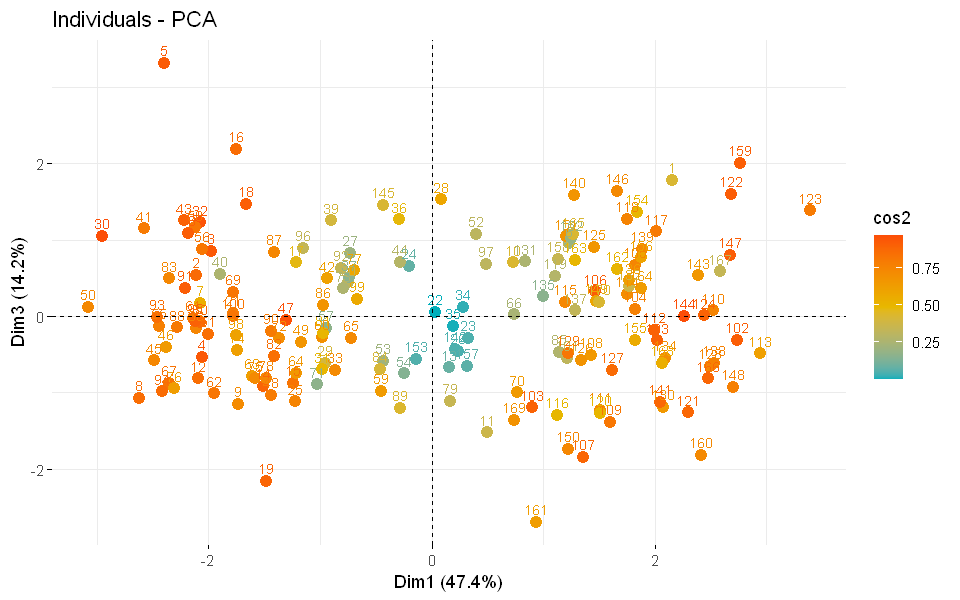

In [36]:
options(repr.plot.width = 8, repr.plot.height = 5)
fviz_pca_ind (res.pca1,
              axe = c(1, 3),
              geom = c("point", "text"),
              labelsize = 3,
              pointsize = 3,
              col.ind = "cos2",
              #select.ind = list(cos2 = 0.8),
              gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
              )

CCL:<br/>Les billets sont mal représentés au milieu, là où, de plus, se dessinait l'intersection d'ellipses sur le graphe des individus.<br/>Il y a donc plus d'incertitude à déterminier la nature des billets, ce qui confirme que ce plan n'est pas déterminant dans notre analyse.

### <span style='color:red'>ii) Contributions des individus:<a name="M1322"></a>

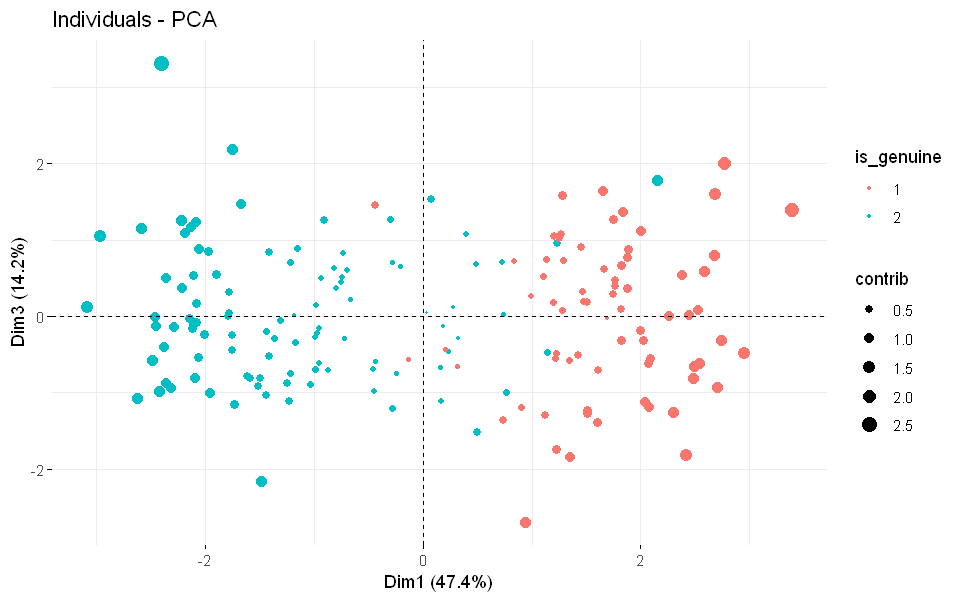

In [37]:
options(repr.plot.width = 8, repr.plot.height = 5)
fviz_pca_ind (res.pca1,
              axe = c(1, 3),
              geom = ("point"),
              habillage = 1,
              pointsize = "contrib",
              pointshape = 20
              )

CCL: On peut affirmer maintenant que l'axe 1 apporte beaucoup à l'identification des billets.

# Mission 2 - Algorithme de classification.<a name="M2"></a>
## <span style='color:blue'>1. Clustering par la méthode des k-means.<a name="M21"></a>
### <span style='color:brown'>a) Détermination du nombre de classes.<a name="M211"></a>

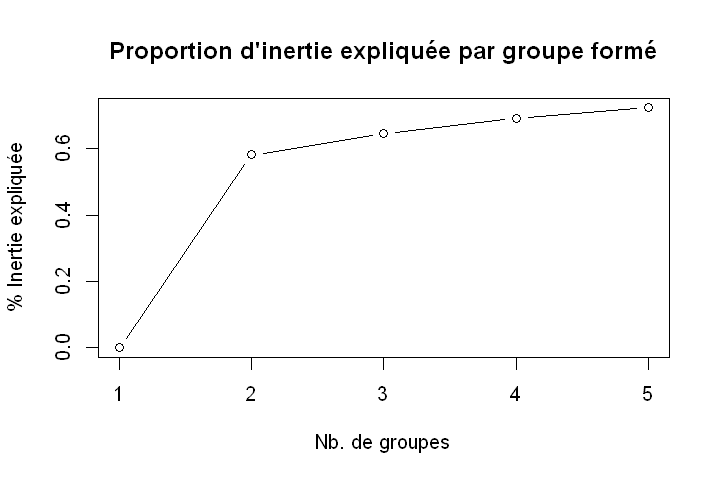

In [38]:
# Piste 1: Evaluer la proportion d'inertie expliquée
options(repr.plot.width = 6, repr.plot.height = 4)
inertie.expl <- rep(0, times = 5)
for (k in 2:5)
{
    clus <- kmeans(notes[, -1], centers = k, nstart = 5)
    inertie.expl[k] <- clus$betweenss/clus$totss
}
plot(1:5,
     inertie.expl,
     type = "b",
     xlab = "Nb. de groupes",
     ylab = "% Inertie expliquée",
     main = "Proportion d'inertie expliquée par groupe formé")

CCL: A partir de k = 2 classes, l’adjonction d’un groupe supplémentaire n’augmente pas « significativement » la part d’inertie expliquée par la partition. 

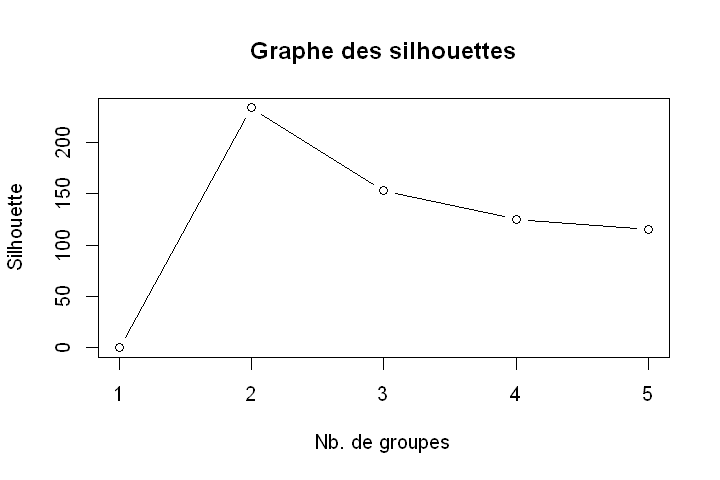

In [39]:
# Piste 2: Indice de Calinski-Harabasz:
options(repr.plot.width = 6, repr.plot.height = 4)
sol.kmeans <- kmeansruns(notes[, -1], krange = 2:5, criterion = "ch") # Evaluation des solutions
plot(1:5, sol.kmeans$crit, type = "b", xlab = "Nb. de groupes", ylab = "Silhouette", main = "Graphe des silhouettes")

CCL: La solution k = 2 classes maximise l’indice.

N.B.: Grace à l'ACP, on savait déjà qu'on devait répartir les individus en deux classes puisqu'on cherche à identifier de deux manières possibles la nature des billets.

### <span style='color:brown'>b) Partionnement.<a name="M212"></a>
La méthode des k-means permet de regrouper ici les points par itération en partant initialement de "centres de gravité" pris au hasard (méthode non supervisée).

### <span style='color:red'>i) Variables non centrées-réduites.

In [40]:
set.seed(1234)
# centers = nombre de groupes demandés:
kmeans <- kmeans(notes[, -1], centers = 2, nstart = 5, iter.max = 10) 

# Matrice de confusion:
confusion <- table(notes$is_genuine, kmeans$cluster)
confusion

sensibilite <- round(confusion[2, 2]/sum(confusion[, 2])*100, 2)
cat(sprintf("Sensibilité: %s\n", sensibilite))
specificite <- round(confusion[1, 1]/sum(confusion[, 1])*100, 2)
cat(sprintf("Spécificité: %s\n", specificite))
precision <- round(confusion[2, 2]/sum(confusion[2, ])*100, 2)
cat(sprintf("Précision: %s\n", precision))
F_score <- round(2*(precision*sensibilite)/(precision + sensibilite), 2)
cat(sprintf("F-mesure: %s\n", F_score))

       
         1  2
  False 68  2
  True   1 99

Sensibilité: 98.02
Spécificité: 98.55
Précision: 99
F-mesure: 98.51


CCL:<br/>
- Trois billets sont mal représentés.
- La probabilité que le billet soit vrai sachant qu'il est dans le groupe 2 est de 98,02%.
- La probabilité que le billet soit faux sachant qu'il est dans le groupe 1 est de 98,55%.

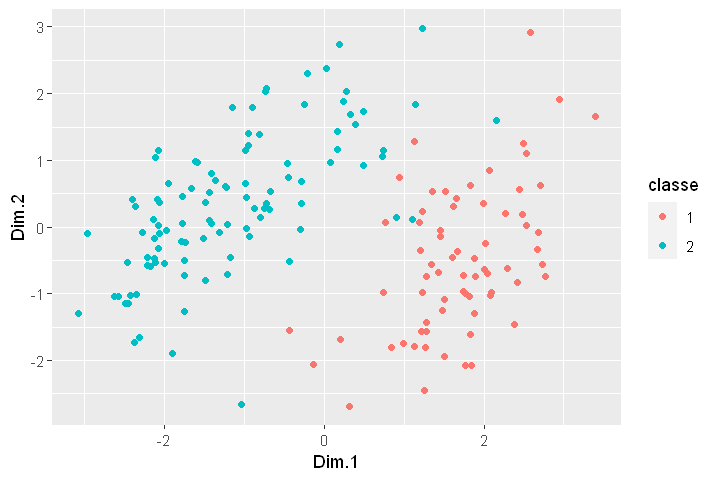

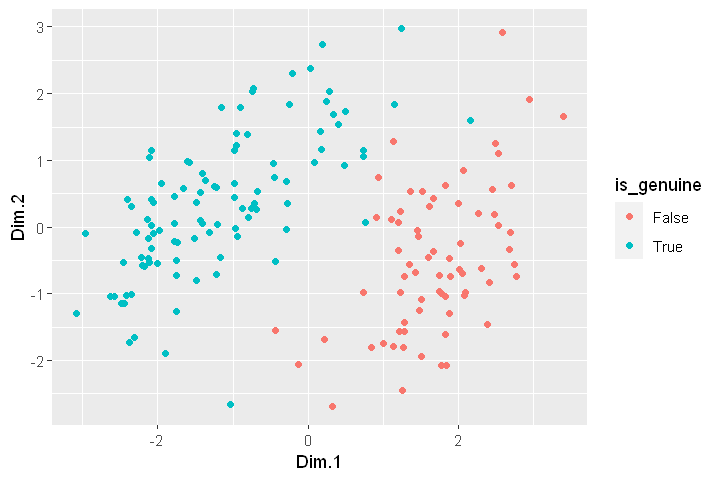

In [41]:
options(repr.plot.width = 6, repr.plot.height = 4)
res <- data.frame(res.pca1$ind$coord, classe = as.factor(kmeans$cluster), is_genuine = notes$is_genuine)
ggplot(res, aes (x = Dim.1, y = Dim.2, color = classe)) +  geom_point()
ggplot(res, aes (x = Dim.1, y = Dim.2, color = is_genuine)) + geom_point() # Afin de comparer plus facilement

### <span style='color:red'>ii) Variables centrées-réduites.

In [42]:
normalisation <- notes[, -1] %>% scale
normalisation %>% head()

diagonal,height_left,height_right,margin_low,margin_up,length
-0.4270822,2.661591,3.0874422,-0.1312025,-1.1863689,0.2808035
-0.8849450,-1.094464,-0.6892183,-0.8575920,-1.2709851,0.7783978
-0.3616732,-1.027391,-0.5079386,-0.3021177,-1.2286770,1.3733475
-0.4597866,-0.960319,-0.8402848,-1.2563941,-0.2132826,1.1461849
0.3578256,-1.228609,-0.5381519,0.6094299,-3.8094710,1.0596467
2.0584590,1.957331,1.5465647,-0.1027167,-0.7632879,0.6377733


In [43]:
set.seed(1234)
kmeans <- kmeans(normalisation, centers = 2, nstart = 5, iter.max = 10)

confusion <- table(notes$is_genuine, kmeans$cluster)
confusion

sensibilite <- round(confusion[2, 2]/sum(confusion[, 2])*100, 2)
cat(sprintf("Sensibilité: %s\n", sensibilite))
specificite <- round(confusion[1, 1]/sum(confusion[, 1])*100, 2)
cat(sprintf("Spécificité: %s\n", specificite))
precision <- round(confusion[2, 2]/sum(confusion[2, ])*100, 2)
cat(sprintf("Précision: %s\n", precision))
F_score <- round(2*(precision*sensibilite)/(precision + sensibilite), 2)
cat(sprintf("F-mesure: %s\n", F_score))

       
         1  2
  False 69  1
  True   8 92

Sensibilité: 98.92
Spécificité: 89.61
Précision: 92
F-mesure: 95.33


CCL:<br/>
- Neuf billets sont mal représentés.
- la spécificité est moins bonne que celle d'avant.

Normaliser les variables est moins performant, certainement en raison des variables déterminantes au départ qui perdent en pertinence dans l'identification une fois normalisées.

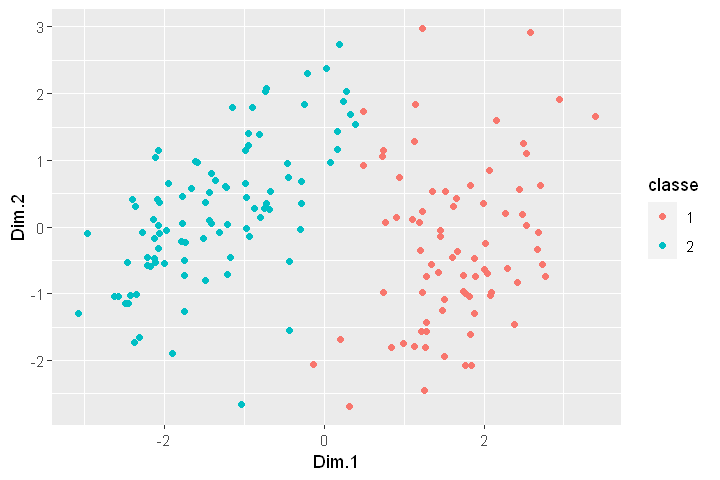

In [44]:
res <- data.frame(res.pca1$ind$coord, classe = as.factor(kmeans$cluster))
ggplot(res, aes (x = Dim.1, y = Dim.2, color = classe)) +  geom_point()

## <span style='color:blue'>2. Clustering par classification hiérarchique ascendante.<a name="M22"></a>
## <span style='color:brown'>a) Distance Euclidienne:<a name="M221"></a>

In [45]:
# Calcul d'une matrice de distance avec les variables non centrées-réduites:
d.notes <- dist(notes[, -1], method = 'euclidean')

# Calcul d'une matrice de distance avec les variables centrées-réduites:
d.norm <- dist(normalisation, method = 'euclidean')

### <span style='color:red'>Méthode "Ward.D2".<a name="M2211"></a>
### <span style='color:purple'>Variables non normalisées.

       groupes.cah
         1  2
  False  0 70
  True  99  1

Sensibilité: 100
Spécificité: 98.59
Précision: 99
F-mesure: 99.5


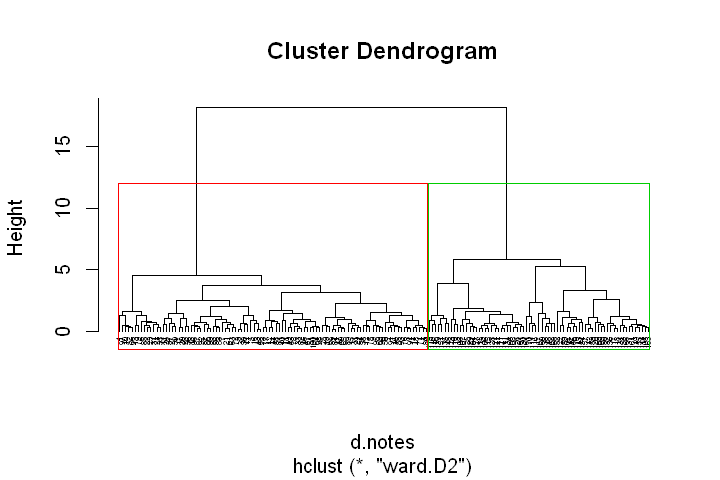

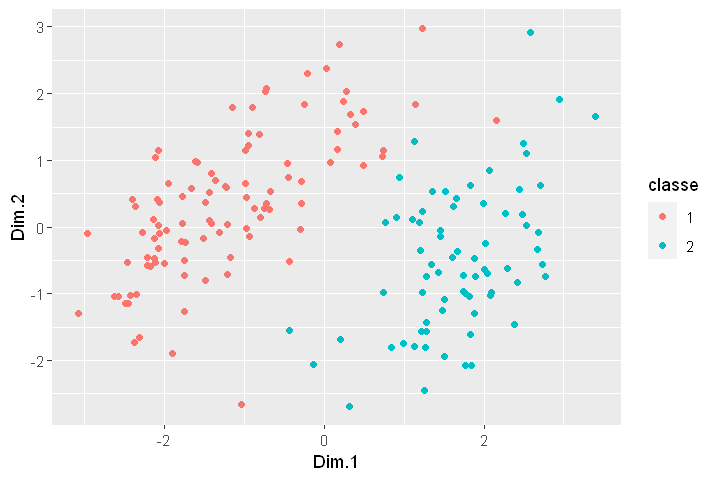

In [46]:
cah.ward2 <- hclust(d.notes, method = 'ward.D2')
plot(cah.ward2, cex = 0.4, hang = -1)
rect.hclust(cah.ward2, k = 2, border = 2:3)

groupes.cah <- cutree(cah.ward2, k = 2)
confusion <- table(notes$is_genuine, groupes.cah)
confusion

sensibilite <- round(confusion[2, 1]/sum(confusion[, 1])*100, 2)
cat(sprintf("Sensibilité: %s\n", sensibilite))
specificite <- round(confusion[1, 2]/sum(confusion[, 2])*100, 2)
cat(sprintf("Spécificité: %s\n", specificite))
precision <- round(confusion[2, 1]/sum(confusion[2, ])*100, 2)
cat(sprintf("Précision: %s\n", precision))
F_score <- round(2*(precision*sensibilite)/(precision + sensibilite), 2)
cat(sprintf("F-mesure: %s\n", F_score))

res <- data.frame(res.pca1$ind$coord, classe = as.factor(groupes.cah))
ggplot(res, aes (x = Dim.1, y = Dim.2, color = classe)) +  geom_point()

### <span style='color:purple'>Variables normalisées.

       groupes.cah
         1  2
  False 69  1
  True   2 98

Sensibilité: 98.99
Spécificité: 97.18
Précision: 98
F-mesure: 98.49


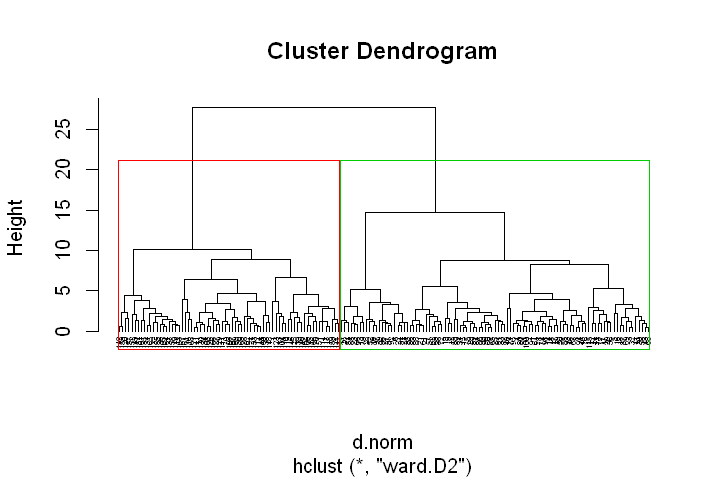

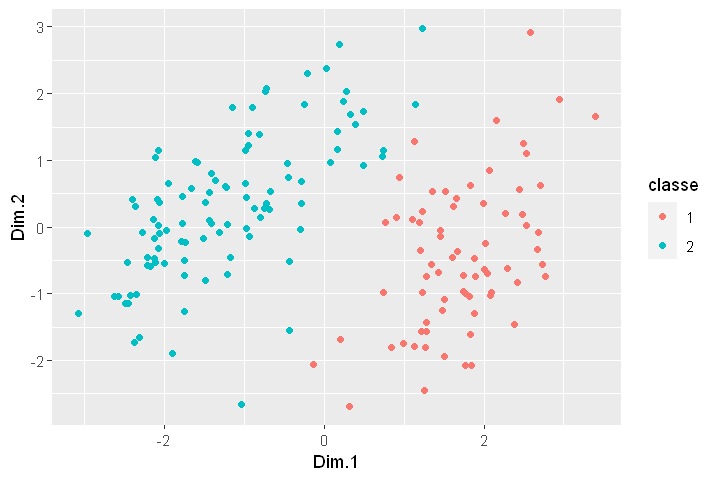

In [47]:
cah.ward2 <- hclust(d.norm, method = 'ward.D2')
plot(cah.ward2, cex = 0.4, hang = -1)
rect.hclust(cah.ward2, k = 2, border = 2:3)

groupes.cah <- cutree(cah.ward2, k = 2)
confusion <- table(notes$is_genuine, groupes.cah)
confusion

sensibilite <- round(confusion[2, 2]/sum(confusion[, 2])*100, 2)
cat(sprintf("Sensibilité: %s\n", sensibilite))
specificite <- round(confusion[1, 1]/sum(confusion[, 1])*100, 2)
cat(sprintf("Spécificité: %s\n", specificite))
precision <- round(confusion[2, 2]/sum(confusion[2, ])*100, 2)
cat(sprintf("Précision: %s\n", precision))
F_score <- round(2*(precision*sensibilite)/(precision + sensibilite), 2)
cat(sprintf("F-mesure: %s\n", F_score))

res <- data.frame (res.pca1$ind$coord, classe = as.factor (groupes.cah))
ggplot (res, aes (x = Dim.1, y = Dim.2, color = classe)) +  geom_point ()

### <span style='color:red'>Méthode "average" et variables non normalisées.<a name="M2212"></a>

       groupes.cah
         1  2
  False 70  0
  True   2 98

Sensibilité: 100
Spécificité: 97.22
Précision: 98
F-mesure: 98.99


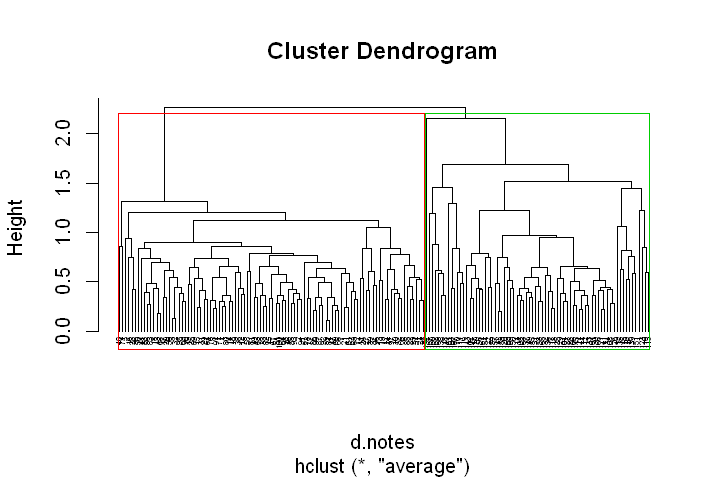

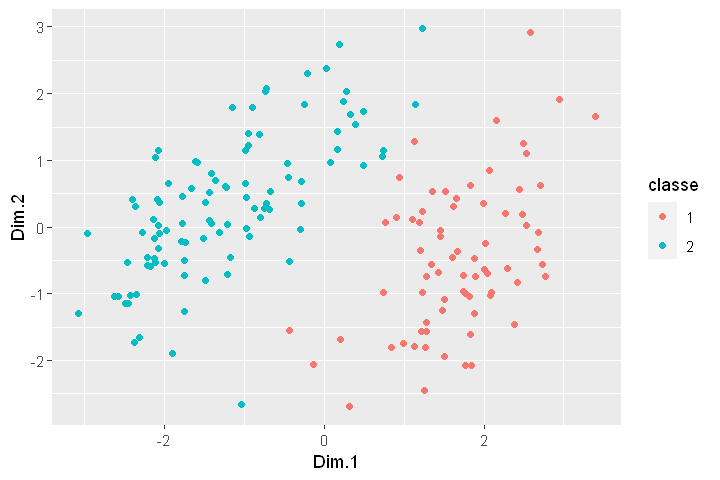

In [48]:
cah.ave <- hclust(d.notes, method = 'average')
plot(cah.ave, cex = 0.4, hang = -1)
rect.hclust(cah.ave, k = 2, border = 2:3)

groupes.cah <- cutree(cah.ave, k = 2)
confusion <- table(notes$is_genuine, groupes.cah)
confusion

sensibilite <- round(confusion[2, 2]/sum(confusion[, 2])*100, 2)
cat(sprintf("Sensibilité: %s\n", sensibilite))
specificite <- round(confusion[1, 1]/sum(confusion[, 1])*100, 2)
cat(sprintf("Spécificité: %s\n", specificite))
precision <- round(confusion[2, 2]/sum(confusion[2, ])*100, 2)
cat(sprintf("Précision: %s\n", precision))
F_score <- round(2*(precision*sensibilite)/(precision + sensibilite), 2)
cat(sprintf("F-mesure: %s\n", F_score))

res <- data.frame (res.pca1$ind$coord, classe = as.factor (groupes.cah))
ggplot (res, aes (x = Dim.1, y = Dim.2, color = classe)) +  geom_point ()

### <span style='color:red'>Méthode "single" et variables non normalisées.<a name="M2213"></a>

       groupes.cah
          1   2
  False  69   1
  True  100   0

Sensibilité: 59.17
Spécificité: 100
Précision: 100
F-mesure: 74.35


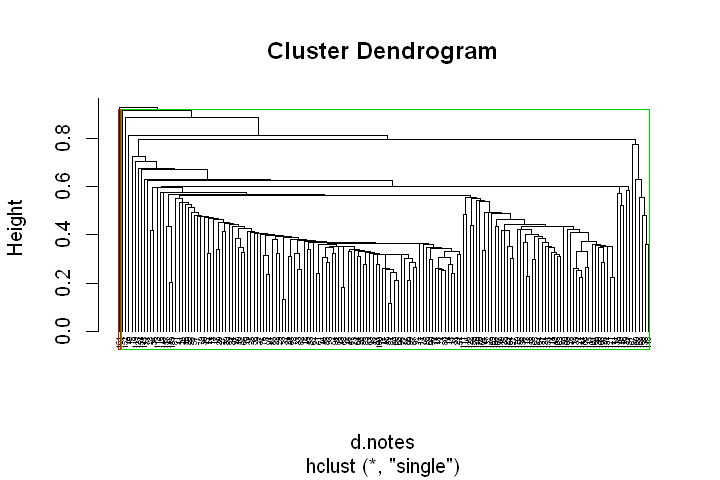

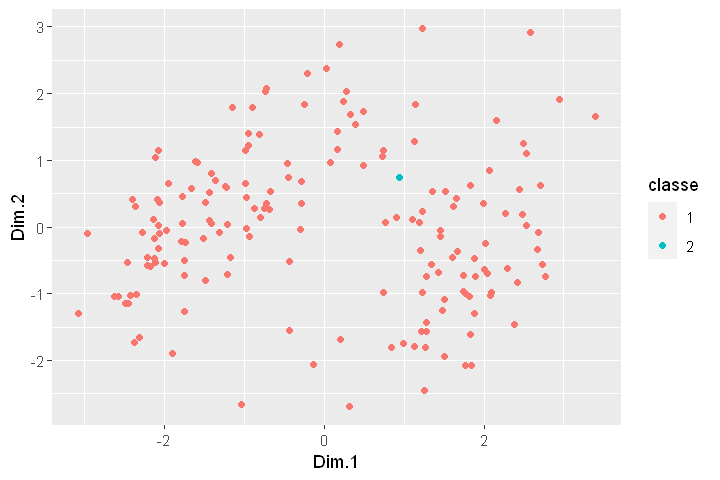

In [49]:
cah.sing <- hclust(d.notes, method = 'single')
plot(cah.sing, cex = 0.4, hang = -1)
rect.hclust(cah.sing, k = 2, border = 2:3)

groupes.cah <- cutree(cah.sing, k = 2)
confusion <- table(notes$is_genuine, groupes.cah)
confusion

sensibilite <- round(confusion[2, 1]/sum(confusion[, 1])*100, 2)
cat(sprintf("Sensibilité: %s\n", sensibilite))
specificite <- round(confusion[1, 2]/sum(confusion[, 2])*100, 2)
cat(sprintf("Spécificité: %s\n", specificite))
precision <- round(confusion[2, 1]/sum(confusion[2, ])*100, 2)
cat(sprintf("Précision: %s\n", precision))
F_score <- round(2*(precision*sensibilite)/(precision + sensibilite), 2)
cat(sprintf("F-mesure: %s\n", F_score))

res <- data.frame (res.pca1$ind$coord, classe = as.factor (groupes.cah))
ggplot (res, aes (x = Dim.1, y = Dim.2, color = classe)) +  geom_point ()

### <span style='color:red'>Méthode "mcquitty" et variables non normalisées.<a name="M2214"></a>

       groupes.cah
          1   2
  False  40  30
  True  100   0

Sensibilité: 71.43
Spécificité: 100
Précision: 100
F-mesure: 83.33


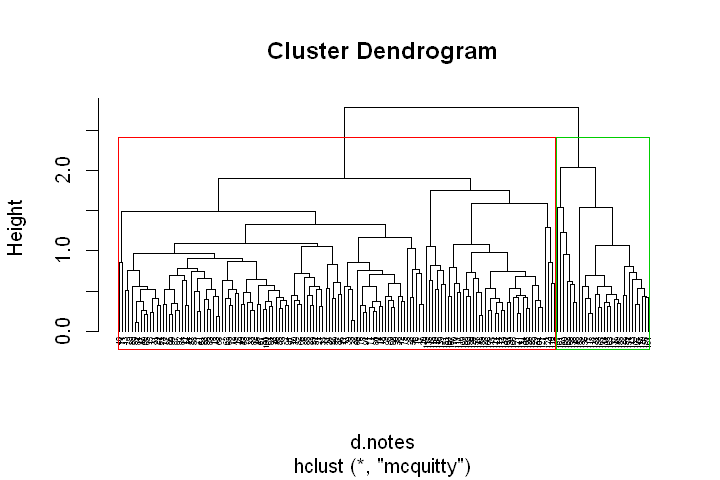

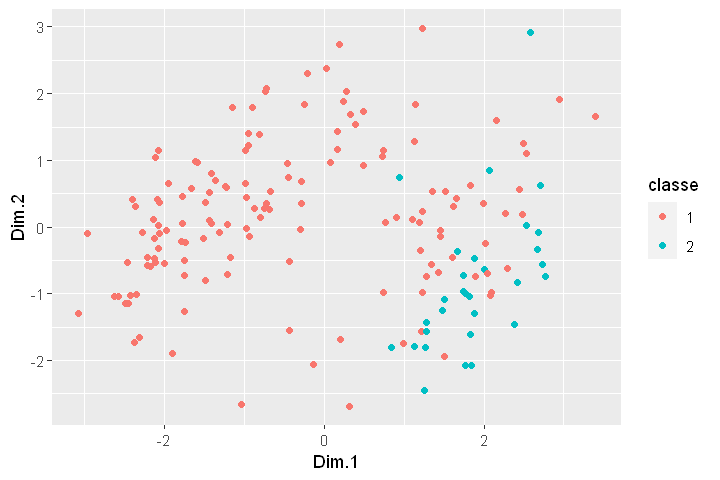

In [50]:
cah.mcq <- hclust(d.notes, method = 'mcquitty')
plot(cah.mcq, cex = 0.4, hang = -1)
rect.hclust(cah.mcq, k = 2, border = 2:3)

groupes.cah <- cutree(cah.mcq, k = 2)
confusion <- table(notes$is_genuine, groupes.cah)
confusion

sensibilite <- round(confusion[2, 1]/sum(confusion[, 1])*100, 2)
cat(sprintf("Sensibilité: %s\n", sensibilite))
specificite <- round(confusion[1, 2]/sum(confusion[, 2])*100, 2)
cat(sprintf("Spécificité: %s\n", specificite))
precision <- round(confusion[2, 1]/sum(confusion[2, ])*100, 2)
cat(sprintf("Précision: %s\n", precision))
F_score <- round(2*(precision*sensibilite)/(precision + sensibilite), 2)
cat(sprintf("F-mesure: %s\n", F_score))

res <- data.frame (res.pca1$ind$coord, classe = as.factor (groupes.cah))
ggplot (res, aes (x = Dim.1, y = Dim.2, color = classe)) +  geom_point ()

### <span style='color:red'>Méthode "median" et variables normalisées.<a name="M2215"></a>

       groupes.cah
          1   2
  False  53  17
  True  100   0

Sensibilité: 65.36
Spécificité: 100
Précision: 100
F-mesure: 79.05


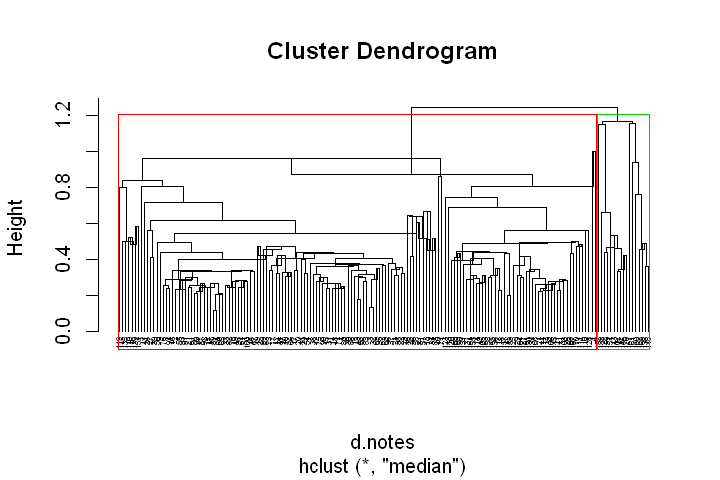

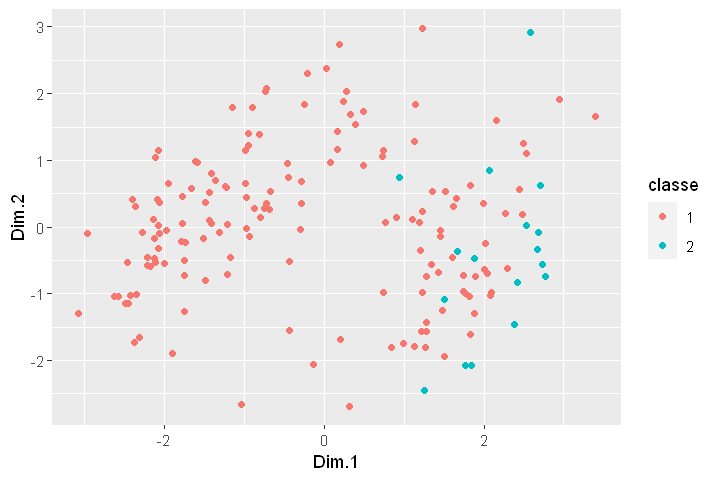

In [51]:
cah.med <- hclust(d.notes, method = 'median')
plot(cah.med, cex = 0.4, hang = -1)
rect.hclust(cah.med, k = 2, border = 2:3)

groupes.cah <- cutree(cah.med, k = 2)
confusion <- table(notes$is_genuine, groupes.cah)
confusion

sensibilite <- round(confusion[2, 1]/sum(confusion[, 1])*100, 2)
cat(sprintf("Sensibilité: %s\n", sensibilite))
specificite <- round(confusion[1, 2]/sum(confusion[, 2])*100, 2)
cat(sprintf("Spécificité: %s\n", specificite))
precision <- round(confusion[2, 1]/sum(confusion[2, ])*100, 2)
cat(sprintf("Précision: %s\n", precision))
F_score <- round(2*(precision*sensibilite)/(precision + sensibilite), 2)
cat(sprintf("F-mesure: %s\n", F_score))

res <- data.frame (res.pca1$ind$coord, classe = as.factor (groupes.cah))
ggplot (res, aes (x = Dim.1, y = Dim.2, color = classe)) +  geom_point ()

### <span style='color:red'>Méthode "centroid" et variables non normalisées.<a name="M2216"></a>

       groupes.cah
          1   2
  False  69   1
  True  100   0

Sensibilité: 59.17
Spécificité: 100
Précision: 100
F-mesure: 74.35


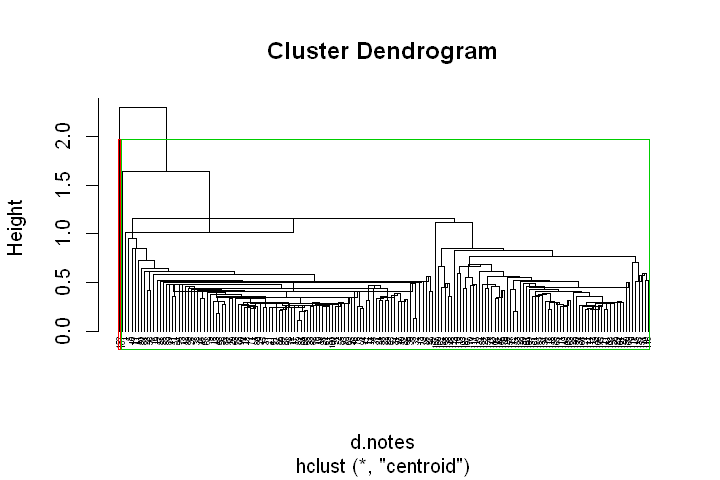

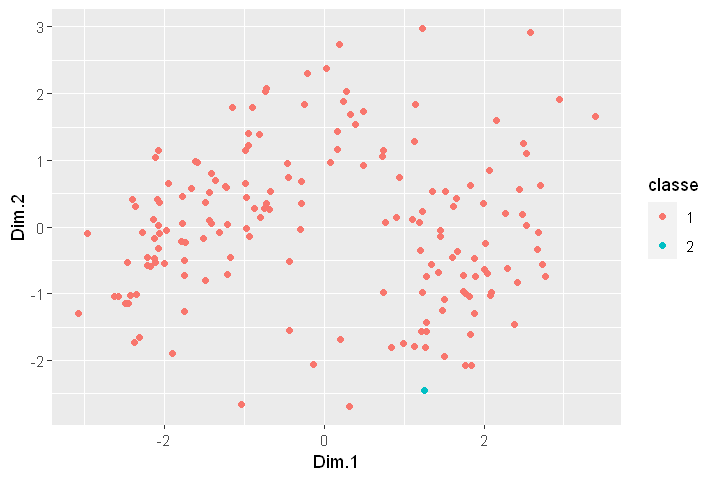

In [52]:
cah.cent <- hclust(d.notes, method = 'centroid')
plot(cah.cent, cex = 0.4, hang = -1)
rect.hclust(cah.cent, k = 2, border = 2:3)

groupes.cah <- cutree(cah.cent, k = 2)
confusion <- table(notes$is_genuine, groupes.cah)
confusion

sensibilite <- round(confusion[2, 1]/sum(confusion[, 1])*100, 2)
cat(sprintf("Sensibilité: %s\n", sensibilite))
specificite <- round(confusion[1, 2]/sum(confusion[, 2])*100, 2)
cat(sprintf("Spécificité: %s\n", specificite))
precision <- round(confusion[2, 1]/sum(confusion[2, ])*100, 2)
cat(sprintf("Précision: %s\n", precision))
F_score <- round(2*(precision*sensibilite)/(precision + sensibilite), 2)
cat(sprintf("F-mesure: %s\n", F_score))

res <- data.frame (res.pca1$ind$coord, classe = as.factor (groupes.cah))
ggplot (res, aes (x = Dim.1, y = Dim.2, color = classe)) +  geom_point ()

## <span style='color:brown'>b) Distance "Manhattan", méthode "average" et variables non normalisées:<a name="M222"></a>

       groupes.cah
         1  2
  False 70  0
  True   2 98

Sensibilité: 100
Spécificité: 97.22
Précision: 98
F-mesure: 98.99


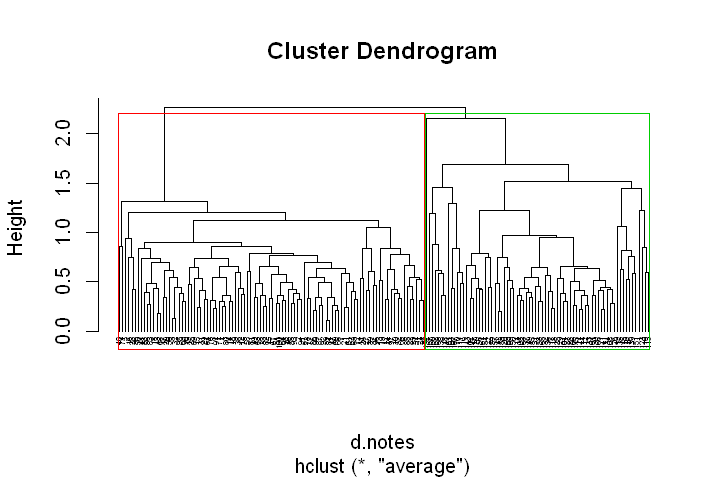

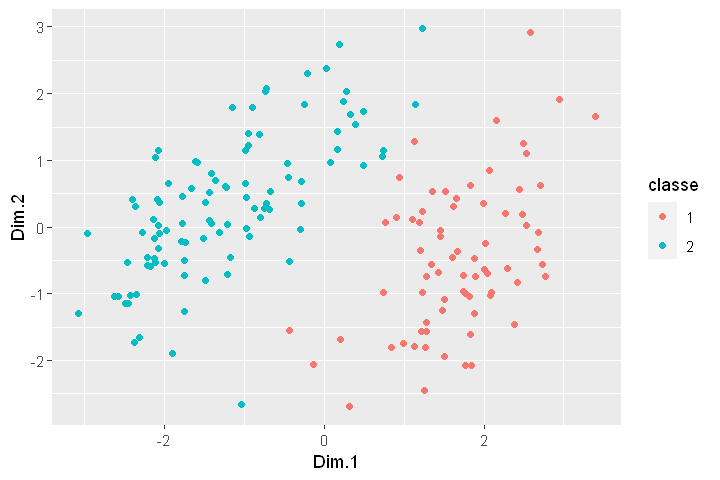

In [53]:
d.norm <- dist(normalisation, method = 'manhattan')

cah.ave <- hclust(d.notes, method = 'average')
plot(cah.ave, cex = 0.4, hang = -1)
rect.hclust(cah.ave, k = 2, border = 2:3)

groupes.cah <- cutree(cah.ave, k = 2)
confusion <- table(notes$is_genuine, groupes.cah)
confusion

sensibilite <- round(confusion[2, 2]/sum(confusion[, 2])*100, 2)
cat(sprintf("Sensibilité: %s\n", sensibilite))
specificite <- round(confusion[1, 1]/sum(confusion[, 1])*100, 2)
cat(sprintf("Spécificité: %s\n", specificite))
precision <- round(confusion[2, 2]/sum(confusion[2, ])*100, 2)
cat(sprintf("Précision: %s\n", precision))
F_score <- round(2*(precision*sensibilite)/(precision + sensibilite), 2)
cat(sprintf("F-mesure: %s\n", F_score))

res <- data.frame (res.pca1$ind$coord, classe = as.factor (groupes.cah))
ggplot (res, aes (x = Dim.1, y = Dim.2, color = classe)) +  geom_point ()

## <span style='color:brown'>c) Distance maximale, méthode "Ward.D2" et variables non normalisées.<a name="M223"></a>

       groupes.cah
         1  2
  False 70  0
  True   2 98

Sensibilité: 100
Spécificité: 97.22
Précision: 98
F-mesure: 98.99


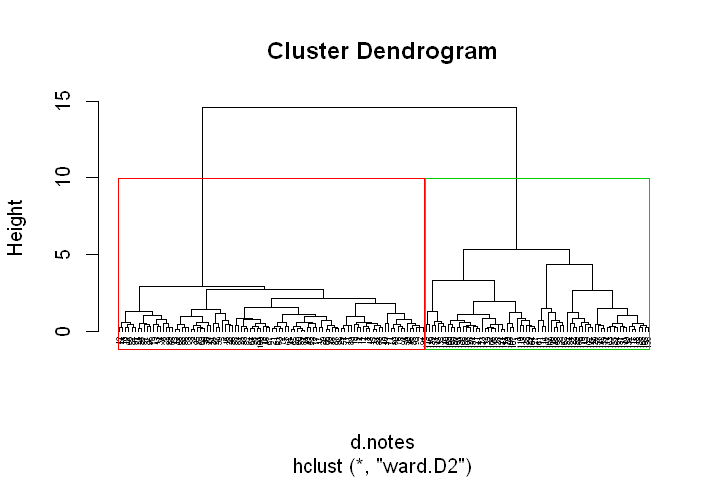

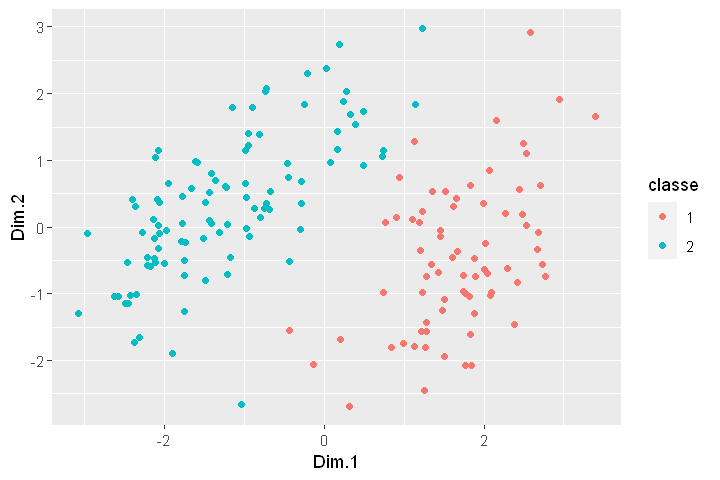

In [54]:
d.notes <- dist(notes[, -1], method = 'maximum')

cah.ward2 <- hclust(d.notes, method = 'ward.D2')
plot(cah.ward2, cex = 0.4, hang = -1)
rect.hclust(cah.ward2, k = 2, border = 2:3)

groupes.cah <- cutree(cah.ward2, k = 2)
confusion <- table(notes$is_genuine, groupes.cah)
confusion

sensibilite <- round(confusion[2, 2]/sum(confusion[, 2])*100, 2)
cat(sprintf("Sensibilité: %s\n", sensibilite))
specificite <- round(confusion[1, 1]/sum(confusion[, 1])*100, 2)
cat(sprintf("Spécificité: %s\n", specificite))
precision <- round(confusion[2, 2]/sum(confusion[2, ])*100, 2)
cat(sprintf("Précision: %s\n", precision))
F_score <- round(2*(precision*sensibilite)/(precision + sensibilite), 2)
cat(sprintf("F-mesure: %s\n", F_score))

res <- data.frame (res.pca1$ind$coord, classe = as.factor (groupes.cah))
ggplot (res, aes (x = Dim.1, y = Dim.2, color = classe)) +  geom_point ()

## <span style='color:brown'>d) Distance "Canberra", méthode "complete" et variables non normalisées:<a name="M224"></a>

       groupes.cah
         1  2
  False 43 27
  True  38 62

Sensibilité: 69.66
Spécificité: 53.09
Précision: 62
F-mesure: 65.61


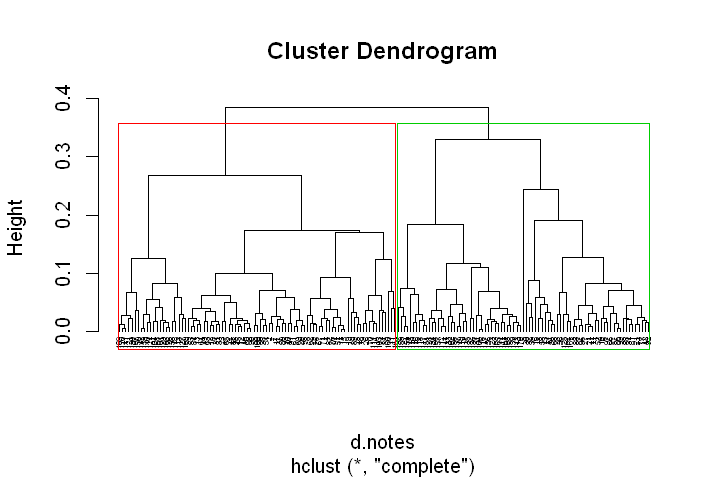

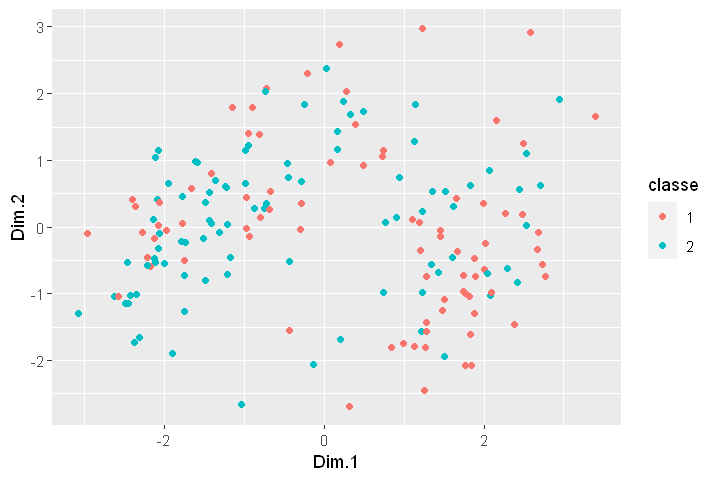

In [55]:
d.notes <- dist(notes[, -1], method = 'canberra')

cah.comp <- hclust(d.notes, method = 'complete')
plot(cah.comp, cex = 0.4, hang = -1)
rect.hclust(cah.comp, k = 2, border = 2:3)

groupes.cah <- cutree(cah.comp, k = 2)
confusion <- table(notes$is_genuine, groupes.cah)
confusion

sensibilite <- round(confusion[2, 2]/sum(confusion[, 2])*100, 2)
cat(sprintf("Sensibilité: %s\n", sensibilite))
specificite <- round(confusion[1, 1]/sum(confusion[, 1])*100, 2)
cat(sprintf("Spécificité: %s\n", specificite))
precision <- round(confusion[2, 2]/sum(confusion[2, ])*100, 2)
cat(sprintf("Précision: %s\n", precision))
F_score <- round(2*(precision*sensibilite)/(precision + sensibilite), 2)
cat(sprintf("F-mesure: %s\n", F_score))

res <- data.frame (res.pca1$ind$coord, classe = as.factor (groupes.cah))
ggplot (res, aes (x = Dim.1, y = Dim.2, color = classe)) +  geom_point ()

## <span style='color:brown'>e) Distance "Minkowski", méthode "average" et variables non normalisées:<a name="M225"></a>

       groupes.cah
         1  2
  False 70  0
  True   2 98

Sensibilité: 100
Spécificité: 97.22
Précision: 98
F-mesure: 98.99


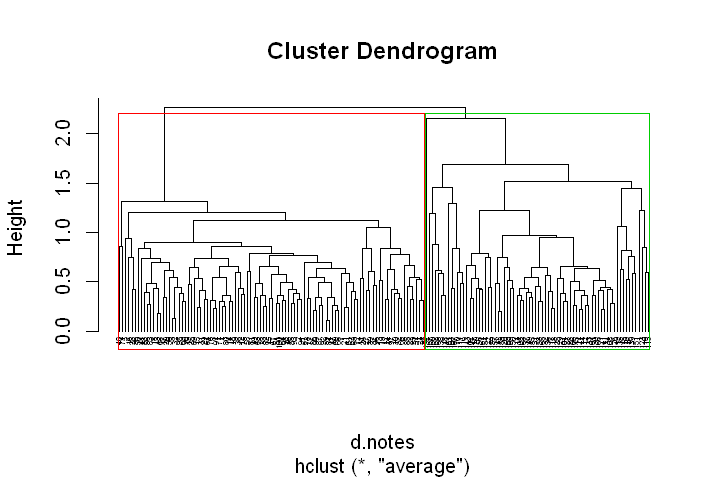

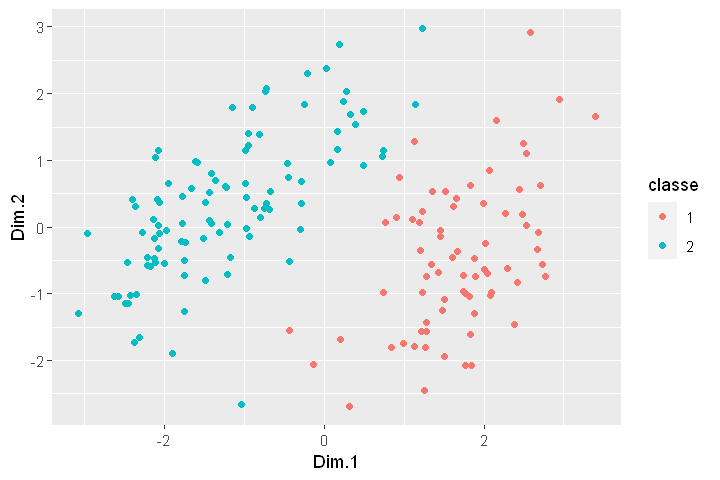

In [56]:
d.notes <- dist(notes[, -1], method = 'minkowski')

cah.ave <- hclust(d.notes, method = 'average')
plot(cah.ave, cex = 0.4, hang = -1)
rect.hclust(cah.ave, k = 2, border = 2:3)

groupes.cah <- cutree(cah.ave, k = 2)
confusion <- table(notes$is_genuine, groupes.cah)
confusion

sensibilite <- round(confusion[2, 2]/sum(confusion[, 2])*100, 2)
cat(sprintf("Sensibilité: %s\n", sensibilite))
specificite <- round(confusion[1, 1]/sum(confusion[, 1])*100, 2)
cat(sprintf("Spécificité: %s\n", specificite))
precision <- round(confusion[2, 2]/sum(confusion[2, ])*100, 2)
cat(sprintf("Précision: %s\n", precision))
F_score <- round(2*(precision*sensibilite)/(precision + sensibilite), 2)
cat(sprintf("F-mesure: %s\n", F_score))

res <- data.frame (res.pca1$ind$coord, classe = as.factor (groupes.cah))
ggplot (res, aes (x = Dim.1, y = Dim.2, color = classe)) +  geom_point ()

## <span style='color:blue'>3. Clustering par l'utilisation de HCPC Factominer.<a name="M23"></a>
    
Par défaut, la commande HCPC de Factominer procède par distance euclidienne et méthode de Ward.  

In [57]:
hc <- HCPC(res.pca1, nb.clust = 2, consol = F) # Sans consolidation par la méthode des k-means.

       
         1  2
  False  5 65
  True  97  3

Sensibilité: 95.1
Spécificité: 95.59
Précision: 97
F-mesure: 96.04


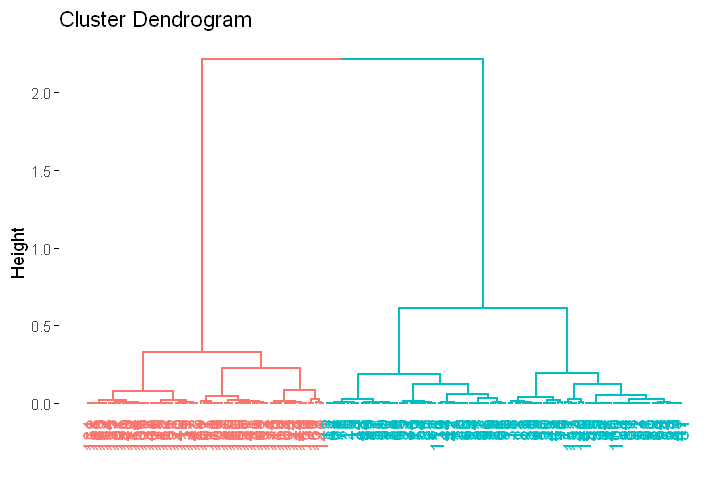

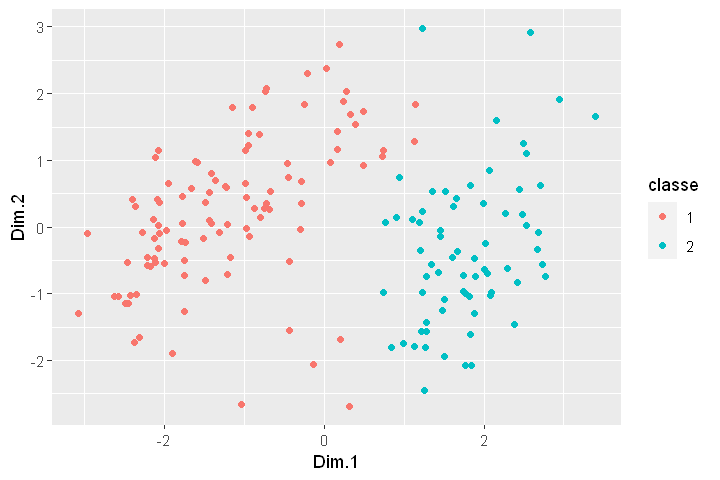

In [58]:
confusion <- table(notes$is_genuine, hc$data.clust$clust)
confusion

sensibilite <- round(confusion[2, 1]/sum(confusion[, 1])*100, 2)
cat(sprintf("Sensibilité: %s\n", sensibilite))
specificite <- round(confusion[1, 2]/sum(confusion[, 2])*100, 2)
cat(sprintf("Spécificité: %s\n", specificite))
precision <- round(confusion[2, 1]/sum(confusion[2, ])*100, 2)
cat(sprintf("Précision: %s\n", precision))
F_score <- round(2*(precision*sensibilite)/(precision + sensibilite), 2)
cat(sprintf("F-mesure: %s\n", F_score))

fviz_dend(hc)

res <- data.frame (res.pca1$ind$coord, classe = as.factor (hc$data.clust$clust))
ggplot (res, aes (x = Dim.1, y = Dim.2, color = classe)) +  geom_point ()

## <span style='color:blue'>4. Comparaison entre la meilleure méthode des k-means et la meilleur des CAH.<a name="M24"></a>

In [59]:
# Méthode des k-means avec variables non centrées-réduites:
set.seed(1234)
kmeans <- kmeans(notes[, -1], centers = 2, nstart = 5, iter.max = 10)

# Méthode par CAH avec distance euclidienne, méthode de Ward 2 et variables non centrées-réduites:
d.notes <- dist(notes[, -1], method = 'euclidean')
cah.ward2 <- hclust(d.notes, method = 'ward.D2')
groupes.cah <- cutree(cah.ward2, k = 2)

confusion <- table(kmeans$cluster, groupes.cah)
confusion

   groupes.cah
     1  2
  1  0 69
  2 99  2

CCL: Niveau d'erreur de 2 billets entre les deux méthodes.

# Mission 3 - Analyse prédictive.<a name="M3"></a>
## <span style='color:blue'>1. Modélisation à l'aide d'une régression logistique multiple à variable binaire.<a name="M31"></a>
### <span style='color:brown'>a) Modélisation:<a name="M311"></a>

In [60]:
# Paramétrage du processus d'apprentissage par validation croisée stratifiée:
train.control <- trainControl(method = "cv", number = 5)

In [61]:
# Méthode de sélection pas à pas "Both", basée sur le critère d'Akaike:
model <- train(is_genuine ~ ., data = notes, method = "glmStepAIC", family = 'binomial', trControl = train.control)
model

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Start:  AIC=14
.outcome ~ diagonal + height_left + height_right + margin_low + 
    margin_up + length



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

               Df Deviance    AIC
- diagonal      1    0.000 12.000
- height_right  1    0.000 12.000
- height_left   1    0.000 12.000
<none>               0.000 14.000
- margin_up     1    8.176 20.176
- length        1    9.231 21.231
- margin_low    1   36.895 48.895


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=12
.outcome ~ height_left + height_right + margin_low + margin_up + 
    length



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

               Df Deviance    AIC
- height_right  1    0.000 10.000
- height_left   1    0.000 10.000
<none>               0.000 12.000
- margin_up     1    8.434 18.434
- length        1    9.261 19.261
- margin_low    1   44.994 54.994


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=10
.outcome ~ height_left + margin_low + margin_up + length



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

              Df Deviance    AIC
- height_left  1    0.000  8.000
<none>              0.000 10.000
- margin_up    1    8.470 16.470
- length       1    9.266 17.266
- margin_low   1   49.876 57.876


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=8
.outcome ~ margin_low + margin_up + length



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

             Df Deviance    AIC
<none>             0.000  8.000
- margin_up   1    8.482 14.482
- length      1   10.991 16.991
- margin_low  1   52.432 58.432


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Start:  AIC=14
.outcome ~ diagonal + height_left + height_right + margin_low + 
    margin_up + length



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

               Df Deviance    AIC
- height_left   1   0.0000 12.000
- diagonal      1   0.0000 12.000
- height_right  1   0.0000 12.000
- length        1   0.0000 12.000
<none>              0.0000 14.000
- margin_up     1   5.2029 17.203
- margin_low    1  31.2005 43.201


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=12
.outcome ~ diagonal + height_right + margin_low + margin_up + 
    length



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

               Df Deviance    AIC
- height_right  1    0.000 10.000
- diagonal      1    0.000 10.000
<none>               0.000 12.000
- margin_up     1    5.501 15.501
- length        1    6.327 16.327
- margin_low    1   33.208 43.208


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=10
.outcome ~ diagonal + margin_low + margin_up + length



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

             Df Deviance    AIC
- diagonal    1    0.000  8.000
<none>             0.000 10.000
- margin_up   1    5.502 13.502
- length      1    6.582 14.582
- margin_low  1   44.595 52.595


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=8
.outcome ~ margin_low + margin_up + length



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

             Df Deviance    AIC
<none>             0.000  8.000
- margin_up   1    5.534 11.534
- length      1    7.277 13.277
- margin_low  1   44.885 50.885


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Start:  AIC=14
.outcome ~ diagonal + height_left + height_right + margin_low + 
    margin_up + length



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

               Df Deviance    AIC
- diagonal      1    0.000 12.000
- height_right  1    0.000 12.000
- height_left   1    0.000 12.000
<none>               0.000 14.000
- length        1    7.474 19.474
- margin_up     1    7.844 19.844
- margin_low    1   38.364 50.364


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=12
.outcome ~ height_left + height_right + margin_low + margin_up + 
    length



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

               Df Deviance    AIC
- height_right  1    0.000 10.000
- height_left   1    0.000 10.000
<none>               0.000 12.000
- length        1    7.891 17.891
- margin_up     1    8.222 18.222
- margin_low    1   43.589 53.589


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=10
.outcome ~ height_left + margin_low + margin_up + length



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

              Df Deviance    AIC
- height_left  1    0.000  8.000
<none>              0.000 10.000
- margin_up    1    8.225 16.225
- length       1    9.903 17.903
- margin_low   1   46.865 54.865


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=8
.outcome ~ margin_low + margin_up + length



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

             Df Deviance    AIC
<none>             0.000  8.000
- margin_up   1    8.226 14.226
- length      1    9.969 15.969
- margin_low  1   51.404 57.404


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Start:  AIC=14
.outcome ~ diagonal + height_left + height_right + margin_low + 
    margin_up + length



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

               Df Deviance    AIC
- diagonal      1   0.0000 12.000
- height_right  1   0.0000 12.000
- height_left   1   0.0000 12.000
<none>              0.0000 14.000
- margin_up     1   7.8394 19.839
- length        1  11.0268 23.027
- margin_low    1  28.7012 40.701


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=12
.outcome ~ height_left + height_right + margin_low + margin_up + 
    length



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

               Df Deviance    AIC
- height_right  1    0.000 10.000
- height_left   1    0.000 10.000
<none>               0.000 12.000
- margin_up     1    7.888 17.888
- length        1   12.379 22.379
- margin_low    1   34.809 44.809


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=10
.outcome ~ height_left + margin_low + margin_up + length



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

              Df Deviance    AIC
- height_left  1    0.000  8.000
<none>              0.000 10.000
- margin_up    1    7.893 15.893
- length       1   12.644 20.644
- margin_low   1   43.933 51.933


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=8
.outcome ~ margin_low + margin_up + length



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

             Df Deviance    AIC
<none>             0.000  8.000
- margin_up   1    7.986 13.986
- length      1   12.649 18.649
- margin_low  1   46.455 52.455


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Start:  AIC=14
.outcome ~ diagonal + height_left + height_right + margin_low + 
    margin_up + length



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

               Df Deviance    AIC
- height_right  1   0.0000 12.000
- height_left   1   0.0000 12.000
- diagonal      1   0.0000 12.000
- margin_up     1   0.0000 12.000
<none>              0.0000 14.000
- length        1   7.1921 19.192
- margin_low    1  23.9521 35.952


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=12
.outcome ~ diagonal + height_left + margin_low + margin_up + 
    length



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

              Df Deviance    AIC
- diagonal     1   0.0000 10.000
- height_left  1   0.0000 10.000
- margin_up    1   0.0000 10.000
<none>             0.0000 12.000
- length       1   7.1992 17.199
- margin_low   1  29.2158 39.216


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=10
.outcome ~ height_left + margin_low + margin_up + length



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

              Df Deviance    AIC
- height_left  1    0.000  8.000
- margin_up    1    0.000  8.000
<none>              0.000 10.000
- length       1    7.690 15.690
- margin_low   1   31.844 39.844


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=8
.outcome ~ margin_low + margin_up + length



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

             Df Deviance    AIC
- margin_up   1    0.000  6.000
<none>             0.000  8.000
- length      1    8.769 14.769
- margin_low  1   32.511 38.511


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=6
.outcome ~ margin_low + length

             Df Deviance    AIC
<none>             0.000  6.000
- margin_low  1   39.515 43.515
- length      1   63.264 67.264


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Start:  AIC=14
.outcome ~ diagonal + height_left + height_right + margin_low + 
    margin_up + length



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

               Df Deviance    AIC
- diagonal      1    0.000 12.000
- height_right  1    0.000 12.000
- height_left   1    0.000 12.000
<none>               0.000 14.000
- margin_up     1    8.265 20.265
- length        1   11.198 23.198
- margin_low    1   42.342 54.342


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=12
.outcome ~ height_left + height_right + margin_low + margin_up + 
    length



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

               Df Deviance    AIC
- height_right  1    0.000 10.000
- height_left   1    0.000 10.000
<none>               0.000 12.000
- margin_up     1    8.568 18.568
- length        1   12.462 22.462
- margin_low    1   47.782 57.782


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=10
.outcome ~ height_left + margin_low + margin_up + length



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

              Df Deviance    AIC
- height_left  1    0.000  8.000
<none>              0.000 10.000
- margin_up    1    8.585 16.585
- length       1   12.716 20.716
- margin_low   1   53.624 61.624


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=8
.outcome ~ margin_low + margin_up + length



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

             Df Deviance    AIC
<none>             0.000  8.000
- margin_up   1    8.586 14.586
- length      1   12.721 18.721
- margin_low  1   57.812 63.812


Generalized Linear Model with Stepwise Feature Selection 

170 samples
  6 predictor
  2 classes: 'False', 'True' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 136, 136, 136, 136, 136 
Resampling results:

  Accuracy   Kappa    
  0.9941176  0.9877256


CCL:<br/>
Le modèle est entraîné sur toutes les données en validation croisée stratifiée.<br/>
Son taux de succès est de 99,4%.

In [62]:
summary(model)


Call:
NULL

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-1.260e-04  -2.100e-08   2.100e-08   2.100e-08   1.291e-04  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)   -5537.30 2968595.16  -0.002    0.999
margin_low     -176.96   51301.98  -0.003    0.997
margin_up      -288.77  108266.26  -0.003    0.998
length           64.83   26529.00   0.002    0.998

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2.3035e+02  on 169  degrees of freedom
Residual deviance: 3.4724e-08  on 166  degrees of freedom
AIC: 8

Number of Fisher Scoring iterations: 25


### <span style='color:brown'>b) Calcul des odd-ratios:<a name="M312"></a>

In [63]:
exp(cbind(OR = coef(model$finalModel), confint(model$finalModel)))

Waiting for profiling to be done...
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

,OR,2.5 %,97.5 %
(Intercept),0.000000e+00,0,Inf
margin_low,1.398310e-77,0,Inf
margin_up,3.895846e-126,0,Inf
length,1.428359e+28,0,Inf


CCL:<br/>
- On conforte ici ce que nous avions déjà observé avec l'ACP à savoir que les variables lenght et margin_low sont fortement liées avec l'authenticité du billet.
- margin_up semble aussi dans ce modèle très corrélé à l'authenticité des billets.
- length très supérieur à 1, contrairement à margin_low et margin_up très proches de 0, confortent l'idée que ces variables contribueront à identifier des billets de nature opposée.

### <span style='color:brown'>c) Évaluation statistique de la régression:<a name="M313"></a>

In [64]:
# Modèle sous-jacent issu de l'échantillon train ( + coefficients de la régression logistique):
model$finalModel


Call:  NULL

Coefficients:
(Intercept)   margin_low    margin_up       length  
   -5537.30      -176.96      -288.77        64.83  

Degrees of Freedom: 169 Total (i.e. Null);  166 Residual
Null Deviance:	    230.3 
Residual Deviance: 3.472e-08 	AIC: 8

In [65]:
deviance(model$finalModel) # Une déviance résiduelle faible est révélatrice d'une bonne adéquation du modèle.

[1] 3.472445e-08

Déviance du modèle : le test de rapport des vraisemblances qui compare la vraisemblance entre le modèle courant et le modèle saturé (le modèle dans lequel nous avons tous les paramètres) et le calcul de la p_value donnent la significativité globale du modèle.

In [66]:
(chi2 <- with(model$finalModel, null.deviance - deviance))
(ddl <- with(model$finalModel, df.null - df.residual))

[1] 230.3481

[1] 3

La statistique du rapport de vraisemblance suit une loi du chi2 à 3 degrés de libertés.

Hypothèse nulle H0: tous les coefficients de la relation linéaire sont nuls.<br/>
Hypothèse alternative H1: un des coefficients au moins est non nul.<br/>
Test bilatéral.<br/>
Seuil alpha fixé à 5%.

In [67]:
(p_value <- pchisq(chi2, ddl, lower.tail = F))

[1] 1.162925e-49

CCL:<br/>
La p-value étant significative, on rejette alors l'hypothèse nulle: au moins un des coefficients est non nul.<br/>
Le modèle est donc globalement significatif: il existe bien une relation entre les variables explicatives et la variable expliquée.

In [68]:
# Nous pouvons donc utiliser à présent cette modélisation:
new_model <- train(is_genuine ~ margin_up + margin_low + length,
                   data = notes, method = 'glm',
                   family = 'binomial',
                   trControl = trainControl('none'))

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

### <span style='color:brown'>d) Courbe ROC:<a name="M314"></a>

In [69]:
# Calcul du score, probabilité pour chaque billet d'appartenir à la classe "Vrai":
score <- predict(new_model, notes, type = 'prob')[, "True"]
quantile(score)

0%          25%          50%          75%         100% 
2.220446e-16 2.220446e-16 1.000000e+00 1.000000e+00 1.000000e+00

Setting levels: control = False, case = True
Setting direction: controls < cases



Call:
roc.default(response = notes$is_genuine, predictor = score, percent = T,     plot = TRUE, col = "red", legacy.axes = T, xlab = "Pourcentage de Faux Positifs",     ylab = "Pourcentage de Vrai Positifs")

Data: score in 70 controls (notes$is_genuine False) < 100 cases (notes$is_genuine True).
Area under the curve: 100%

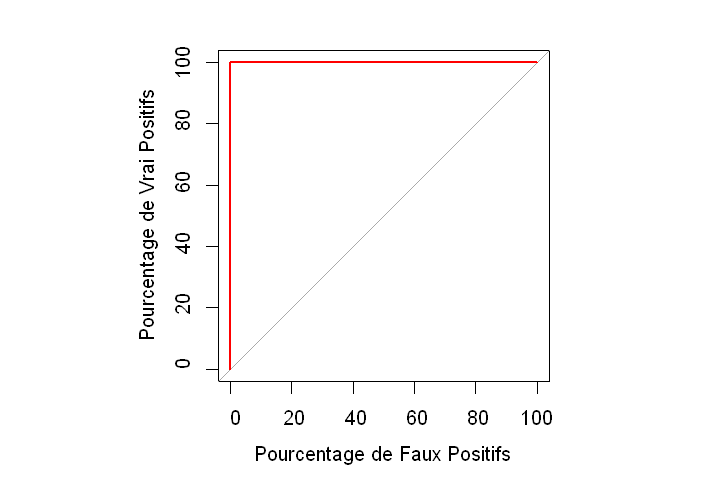

In [70]:
par(pty = 's')
roc(notes$is_genuine, score, plot = TRUE, col = 'red', legacy.axes = T, percent = T, xlab = 'Pourcentage de Faux Positifs',
    ylab = 'Pourcentage de Vrai Positifs')

CCL: La courbe ROC confirme que le modèle est idéal.

## <span style='color:blue'>2. Identification d'un billet.<a name="M32"></a>
### <span style='color:brown'>a) Programme.<a name="M321"></a>

In [71]:
identification <- function(file) 
{
    fichier <- read.csv(file, encoding = 'UTF-8')
    for (i in 1:nrow(fichier)) {
        score <- predict(model, fichier[i, -7], type = 'prob')[, 'True']
        if (score >= 0.5) {
            fichier[i, c('score', 'is_genuine')] <- c(score, 'True')}
        else {
            fichier[i, c('score', 'is_genuine')] <- c(score, 'False')}
    }
    fichier[, c('id', 'score', 'is_genuine')]
}

In [72]:
identification('example.csv')

id,score,is_genuine
A_1,2.22044604925031e-16,False
A_2,2.22044604925031e-16,False
A_3,2.22044604925031e-16,False
A_4,1,True
A_5,1,True
B,1,True


### <span style='color:brown'>b) Vérification par le graphique des individus.<a name="M322"></a>

In [73]:
ex <- read.csv('example.csv', encoding = 'UTF-8')
ex$is_genuine <- as.numeric(as.factor(identification('example.csv')$is_genuine))
rownames(ex) <- ex$id
ex <- ex[, c(8, 1:6)]
ex

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
A_1,1,171.76,104.01,103.54,5.21,3.30,111.42
A_2,1,171.87,104.17,104.13,6.00,3.31,112.09
A_3,1,172.00,104.58,104.29,4.99,3.39,111.57
A_4,2,172.49,104.55,104.34,4.44,3.03,113.20
A_5,2,171.65,103.63,103.56,3.77,3.16,113.33
B,2,171.81,104.86,104.95,4.52,2.89,112.83


In [74]:
verif <- rbind(ex, auth)
head(verif)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
A_1,1,171.76,104.01,103.54,5.21,3.30,111.42
A_2,1,171.87,104.17,104.13,6.00,3.31,112.09
A_3,1,172.00,104.58,104.29,4.99,3.39,111.57
A_4,2,172.49,104.55,104.34,4.44,3.03,113.20
A_5,2,171.65,103.63,103.56,3.77,3.16,113.33
B,2,171.81,104.86,104.95,4.52,2.89,112.83


In [75]:
res.verif <- PCA(verif, ncp = 3, scale.unit = TRUE, ind.sup = 1:5, quanti.sup = 1, graph = F)

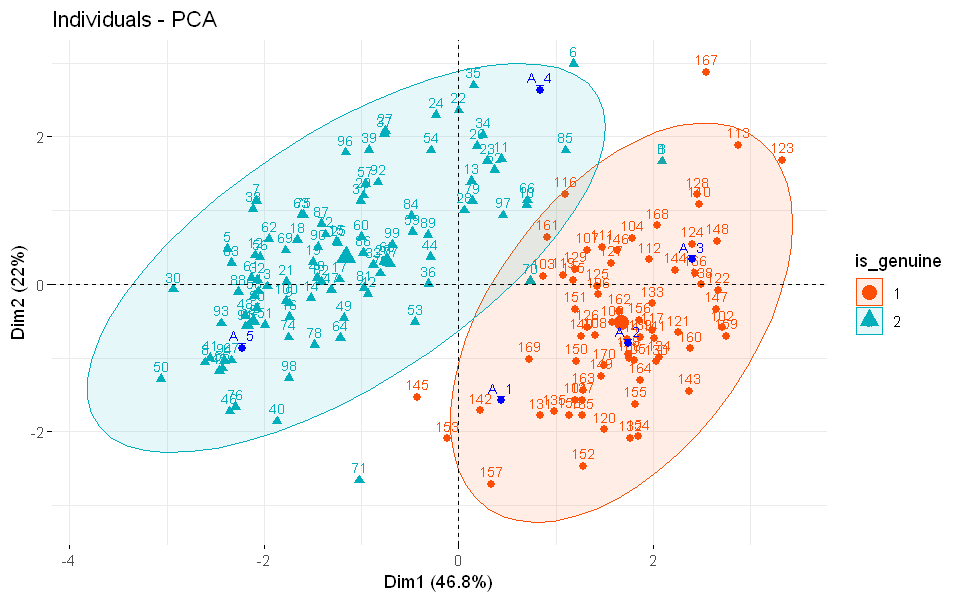

In [76]:
options(repr.plot.width = 8, repr.plot.height = 5)
fviz_pca_ind (res.verif,
              geom = c('point', 'text'),
              habillage = 1,
              pointsize = 2,
              labelsize = 3,
              palette = c("#FC4E07", "#00AFBB"),
              addEllipses = TRUE
             )

CCL: Confirmation de la nature des billets.

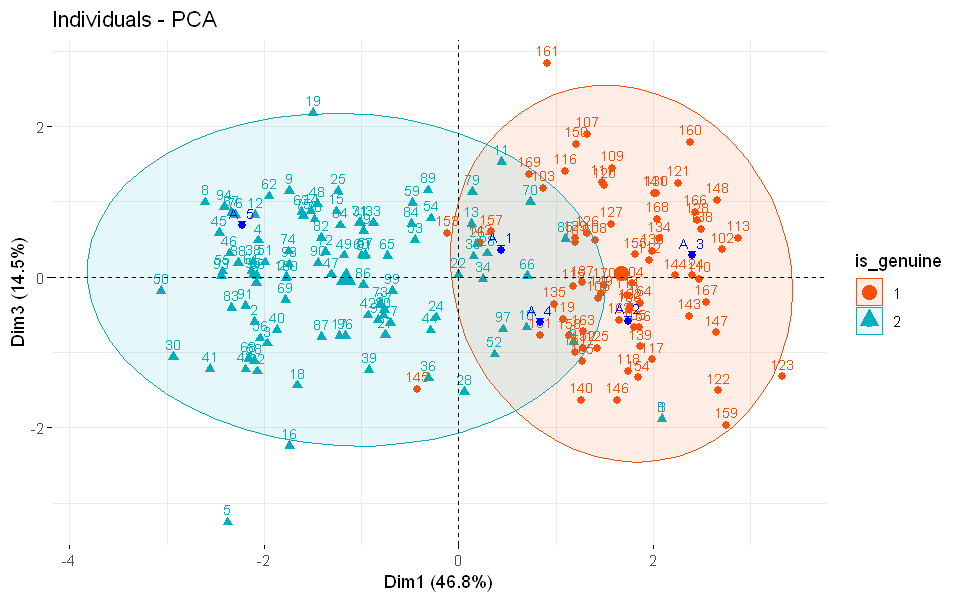

In [77]:
options(repr.plot.width = 8, repr.plot.height = 5)
fviz_pca_ind (res.verif,
              axes = c(1, 3),
              geom = c('point', 'text'),
              habillage = 1,
              pointsize = 2,
              labelsize = 3,
              palette = c("#FC4E07", "#00AFBB"),
              addEllipses = TRUE
             )

CCL: Avec ce plan factoriel, il aurait été compliqué voire impossible de vérifier l'identité des billets.

In [78]:
identification('example_test.csv')

id,score,is_genuine
A_1,2.22044604925031e-16,False
A_2,2.22044604925031e-16,False
A_3,2.22044604925031e-16,False
A_4,1,True
A_5,1,True


In [79]:
ex <- read.csv('example_test.csv', encoding = 'UTF-8')
ex$is_genuine <- as.numeric(as.factor(identification('example_test.csv')$is_genuine))
rownames(ex) <- ex$id
ex <- ex[, c(8, 1:6)]
verif <- rbind(ex, auth)
head(verif)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
A_1,1,171.60,104.01,103.24,5.21,3.30,111.42
A_2,1,171.87,104.17,104.13,6.00,3.31,112.09
A_3,1,172.00,104.78,104.29,4.99,3.39,111.57
A_4,2,170.49,104.55,104.34,4.43,3.03,113.20
A_5,2,171.65,103.63,103.56,3.77,3.16,113.33
1,2,171.81,104.86,104.95,4.52,2.89,112.83


In [80]:
res.verif <- PCA(verif, ncp = 3, scale.unit = TRUE, ind.sup = 1:5, quanti.sup = 1, graph = F)

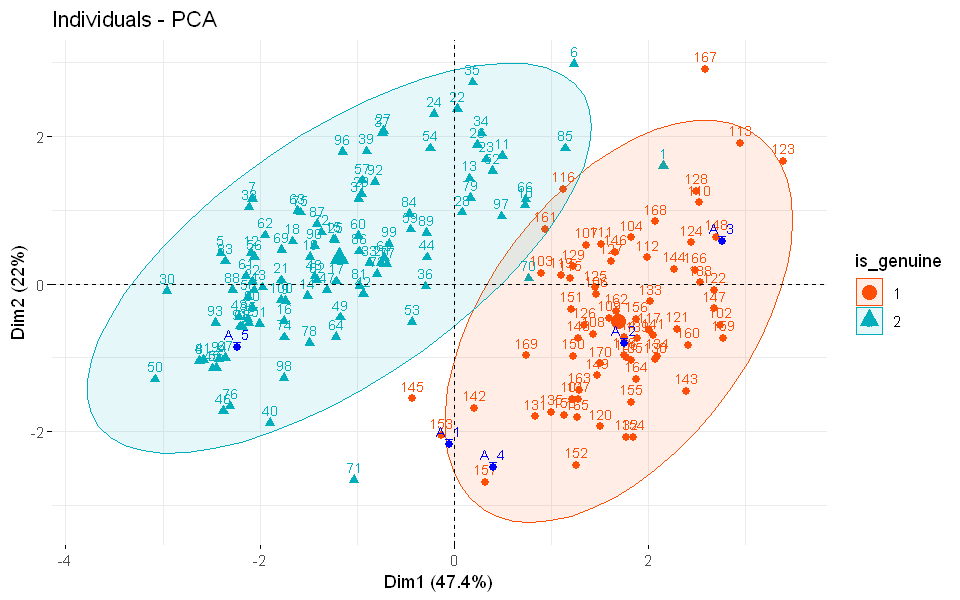

In [81]:
options(repr.plot.width = 8, repr.plot.height = 5)
fviz_pca_ind (res.verif,
              geom = c('point', 'text'),
              habillage = 1,
              pointsize = 2,
              labelsize = 3,
              palette = c("#FC4E07", "#00AFBB"),
              addEllipses = TRUE
             )